# 파이토치 배우기
교재 
- 파이토치 첫걸음(한빛미디어,최건호 지음)

##3장 선형회귀분석

###3.3 파이토치에서의 경사하강법

torch.Tensor 함수는 텐서생성

  인수로 data,dtype,device,requires_grad 등을 받음
- data : 배열이 들어감
- dtype : 데이터에 들어갈 자료형 (default:FloatTensor=> CPU용, GPU용은 torch.- cuda.FloatTensor)
- device : 이 텐서를 어느 기기에 올릴 것인지 명시
- requires_grad : 기울기 저장여부 (default:False)

In [ ]:
import torch
X = torch.Tensor([[1,2,3],[4,5,6]])

In [ ]:
x_tensor = torch.tensor(data=[2.0,3.0],requires_grad=True)

기울기 계산

In [ ]:
x = torch.tensor(data=[2.0,3.0],requires_grad=True)
y = x**2
z = 2*y +3

# 목표값을 지정합니다. 
target = torch.tensor([3.0,4.0])

# z와 목표값의 절대값 차이를 계산합니다. 
# backward는 스칼라 값에 대해서 동작하기 때문에 길이 2짜리 텐서인 loss를 torch.sum을 통해 하나의 숫자로 바꿔줍니다.
loss = torch.sum(torch.abs(z-target))

# 그리고 스칼라 값이 된 loss에 대해 backward를 적용합니다.
loss.backward()

# 여기서 y와 z는 기울기가 None으로 나오는데 이는 x,y,z중에 x만이 leaf node이기 때문입니다.
print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  app.launch_new_instance()


선형회귀분석모델

In [ ]:
# 넘파이와 파이토치를 불러옵니다.
import numpy as np
import torch

# Neural Network의 약자로 인공신경망 연산들이 들어가 있습니다. (ex. Linear, Convolution, RNN 등등)
import torch.nn as nn           

# 모델을 최적화 하는데 필요한 최적화 함수들이 들어가 있습니다 (ex. SGD, ADAM, LBFGS 등등)
import torch.optim as optim

# 텐서를 초기화 하는 함수들이 들어가 있습니다. (ex. uniform, normal, xavier 등등)
import torch.nn.init as init

# 데이터나 학습 결과를 출력하기 위해 사용합니다.
import matplotlib.pyplot as plt

In [ ]:
# 데이터의 개수는 1000개, 학습 횟수는 500회로 지정해줍니다. 
# 이는 임의로 지정한 수치입니다.

num_data = 1000 
num_epoch = 500

# 데이터에 추가할 노이즈를 정규분포를 따르게 만들어줍니다. 
# 이때 평균은 디폴트로 0, 편차는 0.2로 임의로 지정했습니다.
noise = init.normal_(torch.FloatTensor(num_data,1),std=0.2)

# x 는 -10에서 10에서 uniform 하게 생성합니다. 
# 이렇게 되면 x는 1000x1 형태를 가지고 -10에서 10 사이의 값들을 uniform 하게 갖게 됩니다.
x = init.uniform_(torch.Tensor(num_data,1),-10,10)

# 연산 그래프를 정의합니다.
y = 2*x+3

# y에 노이즈를 더해 y_noise를 만들어줍니다. 
# 학습때 y_noise를 목표값으로 사용합니다.
# 이렇게 하는 이유는 실제 데이터를 사용할 때 여러 측정과정에서 노이즈가 추가되는 경우가 많기 때문입니다.
y_noise = y+noise

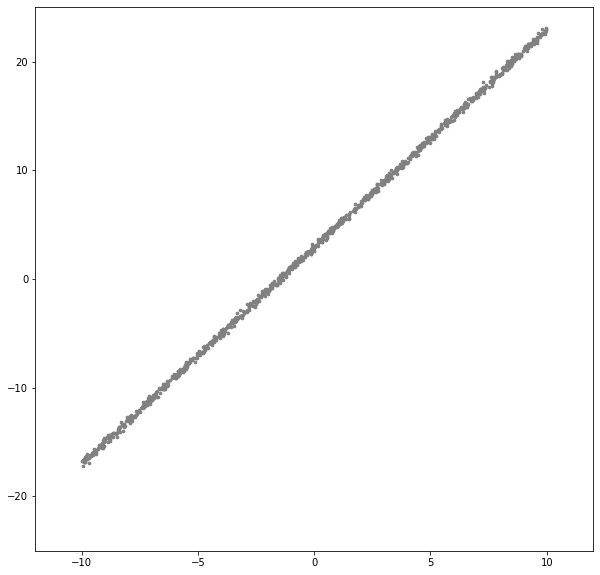

In [ ]:
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html
# matplotlib의 scatter 함수를 사용해 학습 데이터를 확인합니다.

# figure의 크기를 지정해줍니다.
plt.figure(figsize=(10,10))

# x축에는 x를 사용하고 y축에는 y_noise를 사용해 scatter plot 해줍니다.
# 이때 점의 크기는 7, 점의 색상은 회색으로 임의로 지정했습니다.
plt.scatter(x.numpy(),y_noise.numpy(),s=7,c="gray")

# figure의 x,y 축 범위를 지정해줍니다.
plt.axis([-12, 12, -25, 25])

# figure를 출력합니다.
plt.show()

nn.Linear() 함수 
인수 : 입력 특성의 수,결과로 나오는 특성의 수, 편차 사용 여부
변수 : weight, bias(편차)

nn.L1Loss() : L1Loss 사용 Least Absolute Deviations, LAD 

In [ ]:
model = nn.Linear(1,1)
loss_func = nn.L1Loss()

optim => optimization function
SGD : stochastic gradient descent
model.parameters() => 앞에 모델의 변수들(weight,bias) 전달

In [ ]:
optimizer = optim.SGD(model.parameters(),lr=0.01)

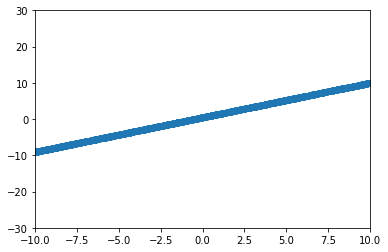

tensor(5.5400)


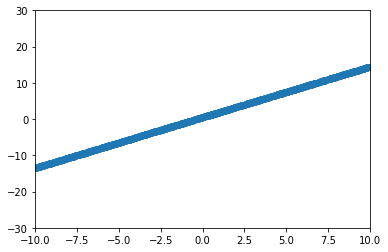

tensor(3.5553)


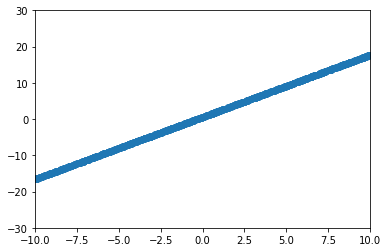

tensor(2.5025)


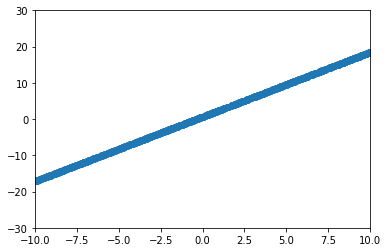

tensor(2.3616)


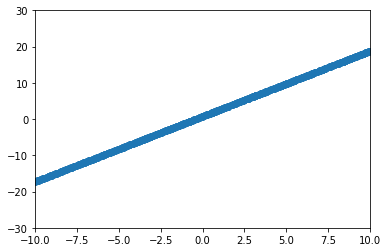

tensor(2.2581)


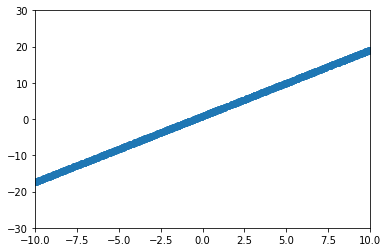

tensor(2.1552)


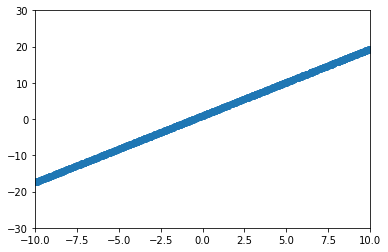

tensor(2.0527)


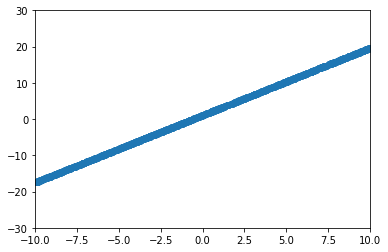

tensor(1.9503)


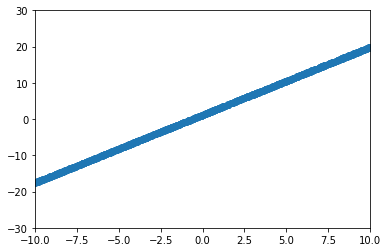

tensor(1.8480)


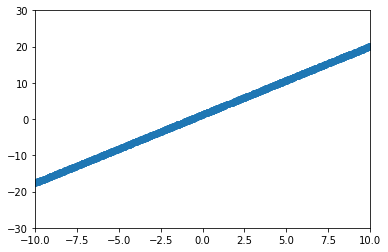

tensor(1.7457)


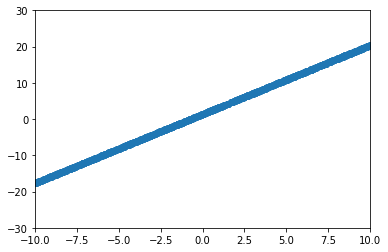

tensor(1.6434)


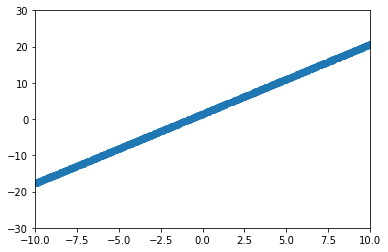

tensor(1.5411)


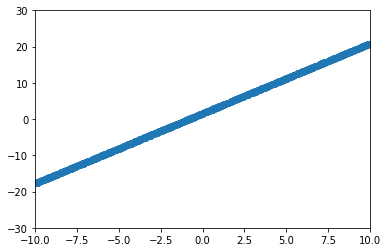

tensor(1.4388)


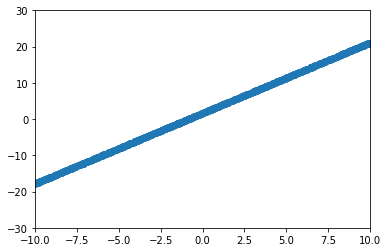

tensor(1.3365)


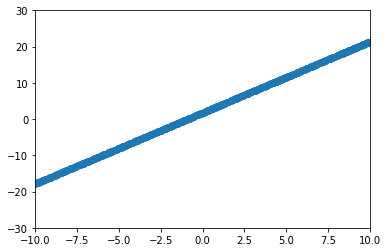

tensor(1.2342)


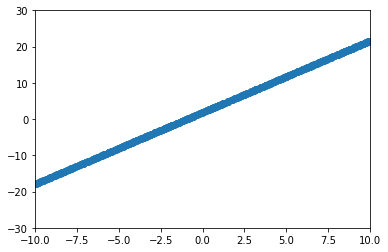

tensor(1.1319)


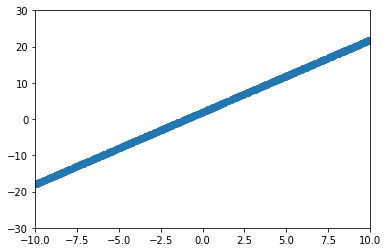

tensor(1.0296)


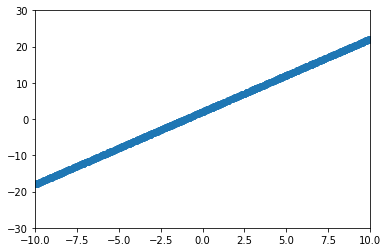

tensor(0.9273)


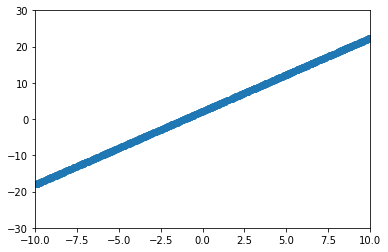

tensor(0.8250)


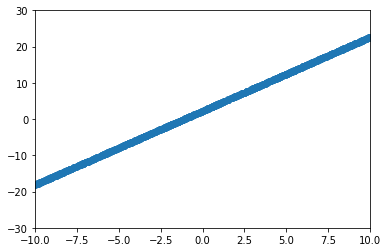

tensor(0.7233)


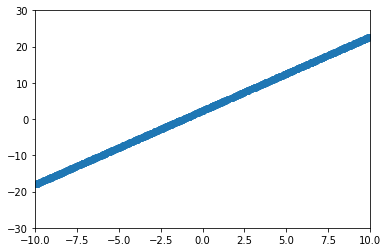

tensor(0.6256)


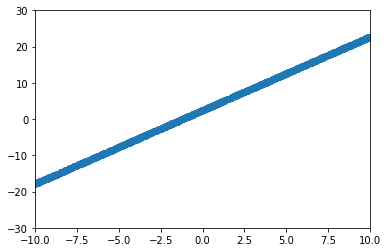

tensor(0.5311)


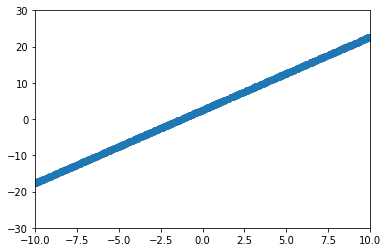

tensor(0.4377)


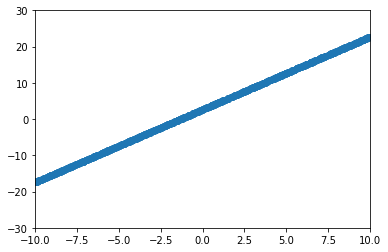

tensor(0.3495)


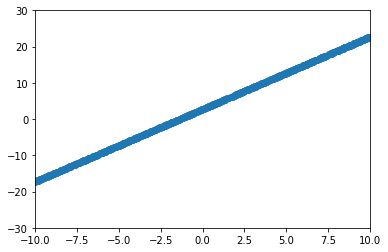

tensor(0.2738)


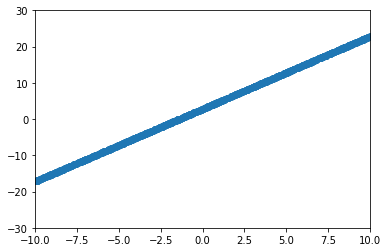

tensor(0.2171)


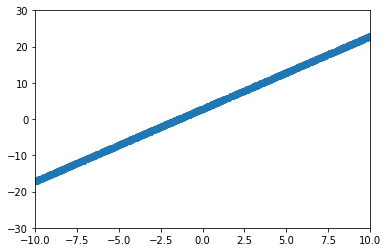

tensor(0.1847)


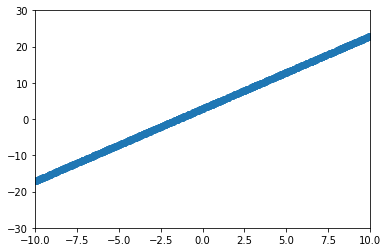

tensor(0.1679)


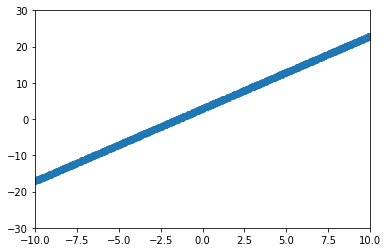

tensor(0.1592)


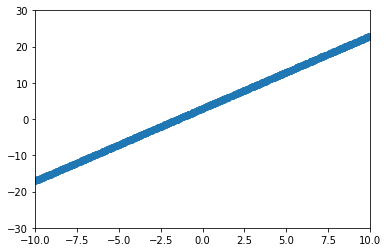

tensor(0.1556)


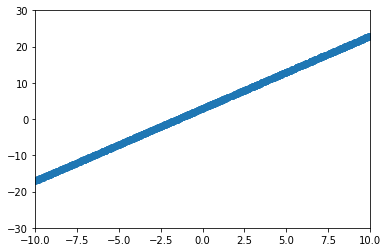

tensor(0.1537)


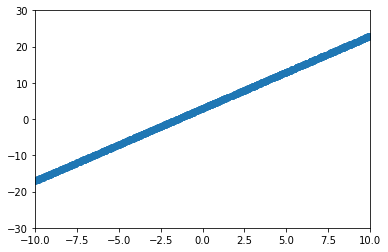

tensor(0.1528)


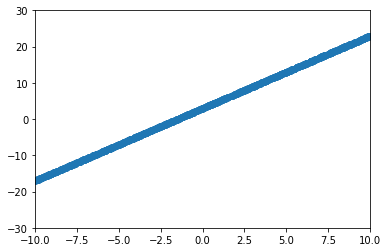

tensor(0.1524)


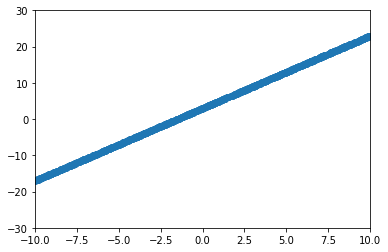

tensor(0.1522)


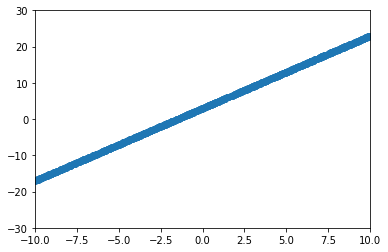

tensor(0.1521)


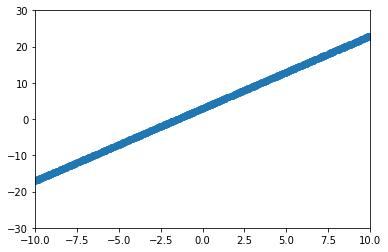

tensor(0.1521)


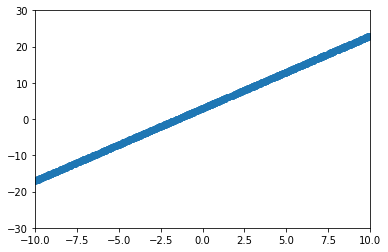

tensor(0.1521)


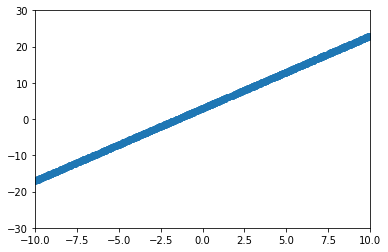

tensor(0.1521)


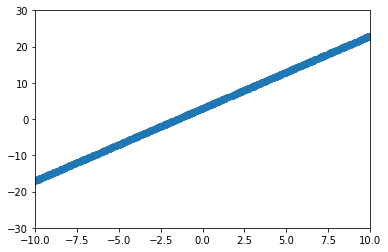

tensor(0.1521)


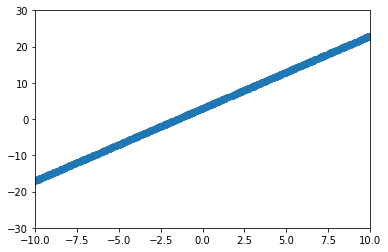

tensor(0.1521)


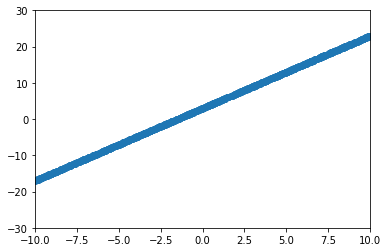

tensor(0.1521)


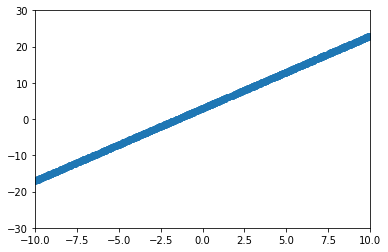

tensor(0.1521)


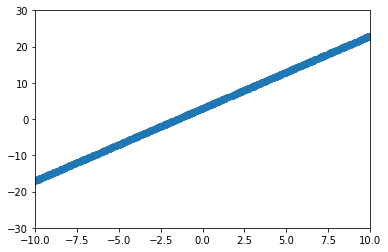

tensor(0.1521)


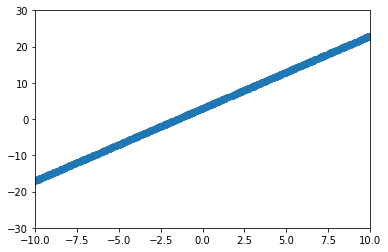

tensor(0.1521)


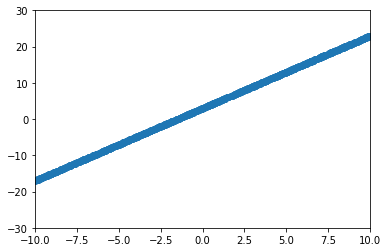

tensor(0.1521)


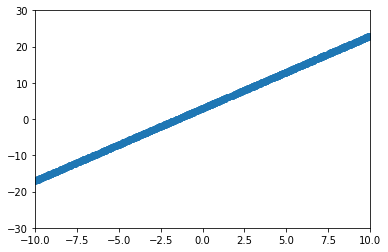

tensor(0.1521)


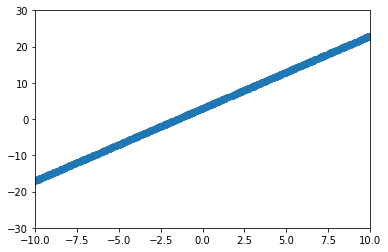

tensor(0.1521)


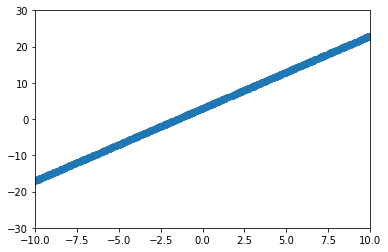

tensor(0.1521)


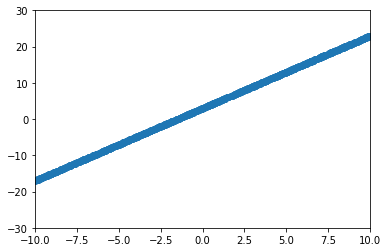

tensor(0.1521)


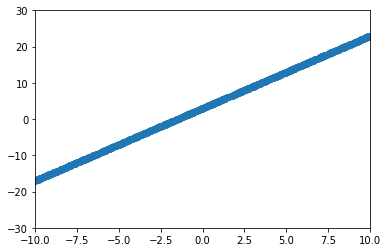

tensor(0.1521)


In [ ]:
# 손실이 어떻게 변하는지 확인하기 위해 loss_arr를 만들어 기록합니다.
loss_arr =[]

# 또한 목표값은 y_noise로 지정해줍니다.
label = y_noise

# 500으로 지정했던 학습 횟수만큼 반복합니다.
for i in range(num_epoch):
  
    # 이전 학습의 기울기를 지우고 최적화 함수를 초기화해줍니다.
    # 기울기를 지우지 않으면 기존의 업데이트 때문에 학습이 잘 이루어지지 않습니다.
    optimizer.zero_grad()
    
    # 입력값 x를 모델에 넣어 결과값을 얻습니다.
    output = model(x)
    
    # 결과값과 목표값의 차이를 L1 손실 함수로 구해줍니다.
    loss = loss_func(output,label)
    
    # 손실에 대한 기울기를 구합니다.
    loss.backward()
    
    # 구한 기울기를 이용해 모델의 변수를 업데이트 합니다.
    optimizer.step()
    
    # 10번 마다 모델의 변수가 어떻게 변하고 있는지 출력해줍니다.
    if i % 10 == 0:
        # https://pytorch.org/docs/stable/tensors.html?highlight=detach#torch.Tensor.detach
        # 현재 연산 그래프에 속해있는 x, output 값을 detach를 통해 분리하고, 텐서를 넘파이 배열로 바꿔서 plt.scatter에 전달합니다.
        plt.scatter(x.detach().numpy(),output.detach().numpy())
        plt.axis([-10, 10, -30, 30])
        plt.show()
        print(loss.data)
        
    # 손실을 loss_arr에 추가해줍니다.
    loss_arr.append(loss.detach().numpy())

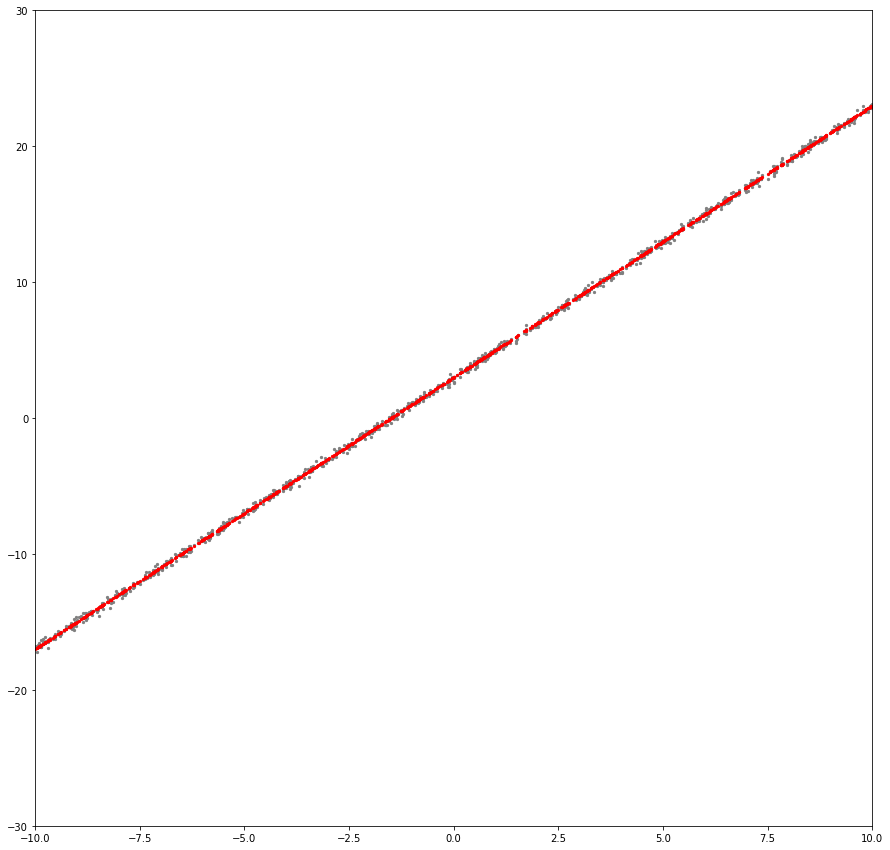

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(x.numpy(),y_noise.numpy(),s=5,c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red")
plt.axis([-10, 10, -30, 30])
plt.show()

손실 그래프

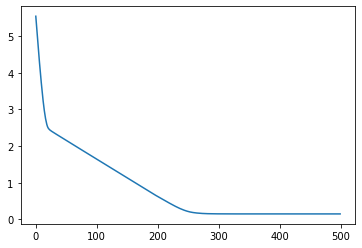

In [ ]:
# matplotlib의 plot 함수를 이용해 손실이 어떻게 줄어가는지 확인합니다. 
plt.plot(loss_arr)
plt.show()

In [ ]:
# 현재 모델은 weight와 bias을 변수로 가지고 있는데 그 값들이 학습 후 실제 몇인지 수치적으로 확인해봅니다.
param_list = list(model.parameters())
print("Weight:",param_list[0].item(),"\nBias:  ",param_list[1].item())

Weight: 1.9983688592910767 
Bias:   3.002720594406128


##4장 인공 신경망

###4.4 모델구현

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

데이터 생성

In [ ]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3 
y_noise = y + noise

sequential class : nn.Linear,nn.ReLU같은 모듈들을 인수로 받아서 순서대로 정렬해놓고 입력값이 들어오면 이 순서대로 모듈을 실행하여 결과를 리턴  


In [ ]:
# 3장의 예시처럼 하나의 값이 들어가서 하나의 값이 나오기 때문에 모델의 처음과 끝 특성의 개수는 1개입니다.

# https://pytorch.org/docs/stable/nn.html?highlight=sequential
# torch.nn.Sequential
# Sequential 모듈은 다양한 모듈을 담을 수 있는 일종의 리스트라고 보면 됩니다.
# Sequential 에 정의된 순서대로 연산이 진행되며, 많은 연산을 묶어서 한번에 관리할 수 있어서 편리합니다.

# 아래 코드는 특성의 개수가 1 -> 6 -> 10 -> 6 -> 1개로 변하는 인공신경망입니다. 
# 또한 선형변환 이후 활성화 함수를 넣어 비선형성이 생기도록 했습니다.
model = nn.Sequential(
          nn.Linear(1,6),
          nn.ReLU(),
          nn.Linear(6,10),
          nn.ReLU(),
          nn.Linear(10,6),
          nn.ReLU(),
          nn.Linear(6,1),
      )

loss_func = nn.L1Loss() #L1Loss사용 LAD
optimizer = optim.SGD(model.parameters(),lr=0.0002)

model learning

In [ ]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

loss graph

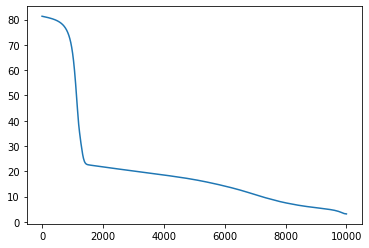

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

실제값 비교

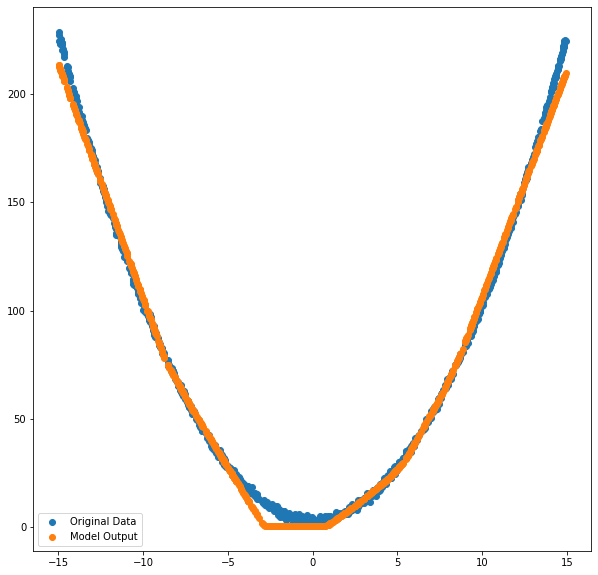

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()

##5장 합성곱 신경망 CNN

###5.2 합성곱 연산 과정

data * kernel(filter) = output


*   이동하는 단위 : stride 
*   필터 하나당 입력 이미지 전체에 대한 필터의 일치 정도 : activation map or feature map



  
  활성화 지도 O의 크기 = floor((I-K)/S+1), I : 입력 이미지 크기, K : 필터의 크기, S : 스트라이드, floor() : 바닥함수


합성곱 연산도 인공 신경망의 일종이다.
  *  하나의 결괏값이 생성될 때 입력값 전체가 들어가지 않고 필터가 지나가는 부분만 연산에 포함된다.
  *  하나의 이미지에 같은 필터를 연달아 적용하기 때문에 가중치가 공유되어 기본 인공 신경망보다 학습의 대상이 되는 변수가 적다

합성곱 연산도 입력과 가중치의 조합으로 이루어진 연산이기 때문에 비선형성을 추가하기 위해서는 활성화 함수가 필요하다.

활성화 함수 ReLU 
  
  ReLU의 어떠한 입력값이 들어와도 활성화 값이 0이 되는 **다잉 뉴런 현상**을 막기 위해
  
  LeakyReLU, randomized ReLU


### 5.3 패딩과 풀링

**Padding** : 일정한 크기의 층으로 이미지를 감싸는 것  
  
  활성화 지도 O의 크기 = floor((I-K+2P)/S+1)


**Pooling**   : downsampling or subsampling의 일종  


*   MaxPooling : 일정 구간 내에서 가장 큰 값만 전달
*   AveragePooling : 일정 구간 내의 값들의 평균을 전달



### 5.6 모델 구현, 학습 및 결과 확인

In [ ]:
# 파이토치 및 토치비젼 설치
# 런타임을 GPU 모드로 바꿔서 실행하세요
!pip install torch torchvision

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

# https://pytorch.org/docs/stable/torchvision/datasets.html
# 파이토치에서는 torchvision.datasets에 MNIST 등의 다양한 데이터를 사용하기 용이하게 정리해놨습니다.
# 이를 사용하면 데이터를 따로 학습에 맞게 정리하거나 하지 않아도 바로 사용이 가능합니다.
import torchvision.datasets as dset

# https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transforms
# torchvision.transforms에는 이미지 데이터를 자르거나 확대 및 다양하게 변형시키는 함수들이 구현되어 있습니다. 
import torchvision.transforms as transforms

# https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# DataLoader는 전처리가 끝난 데이터들을 지정한 배치 크기에 맞게 모아서 전달해주는 역할을 합니다.
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

1.9.0+cu102


파라미터 지정  
  - batch size : 데어터를 하나씩 전달하지 않고 원하는 배치 사이즈대로 묶어서 전달하거나 더 효율적인 학습을 위해 데이터를 어떤 규칙에 따라 정렬하거나 섞거나 해야함   
  => DataLoader 모듈이 이런 역할을 함  
  - torchvision은 유명한 영상처리용 데이터셋, 모델, 이미지 변환기가 들어있는 패키지임,  

1.   여기서는 dataset모듈은 데이터를 읽어오는 역할
2.   transforms는 불러온 이미지를 필요에 따라 반환해주는 역할


In [ ]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

In [ ]:
# https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=mnist#torchvision.datasets.MNIST
# 첫번째 인자 root는 데이터를 저장할 위치, train은 학습용 데이터인지 테스트용 데이터인지의 여부를 의미합니다.

# MNIST 데이터는 숫자 손글씨 이미지와 이에 대한 정답 쌍으로 이루어져 있습니다. 
# transform은 이미지에 대한 변형, target_transform은 정답 라벨에 대한 변형을 의미합니다.
# transform.ToTensor()는 PIL 이미지나 Numpy 배열을 토치 텐서로 바꿔줍니다.

# download는 데이터가 저장할 위치에 없을 경우 새로 다운받을지 여부입니다.
mnist_train = dset.MNIST(root="../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST(root="../", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

KeyboardInterrupt: ignored

데이터셋 체크  
- getitem을 사용해도 되고 
- 인덱싱으로도 데이터를 확인할 수 있습니다.

In [ ]:
print(mnist_train.__getitem__(0)[0].size(), mnist_train.__len__())
print(mnist_test.__getitem__(0)[0].size(), mnist_test.__len__())

print(len(mnist_train),len(mnist_test))
#print(mnist_train[0])

DataLoader 설정  
- 사용할 데이터
- 배치 사이즈 (batch_size)
- 섞을지 여부 (shuffle)
- 사용할 프로세스 개수 (num_workers)
- 마지막에 남는 데이터의 처리 여부 (drop_last)

In [ ]:
# https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader

train_loader = DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

CNN모델

nn.Conv2d 함수
  

*   in_channels, out_channels : 입력 채널과 출력 채널 (예, 3,16 => 입력이미지 3채널(RGB사진), 필터 개수 :16=> 결과는 16채널
*   kernel_size : 커널 크기
*   stride : 스트라이드. 기본값 1
*   padding : padding 기본값 1



nn.MaxPool2d 함수


*   kernel_size : 커널 크기
*   stride : stride
*   padding : padding



view 함수

*   인수인 텐서를 목표로 하는 [batch_size, -1]을 전달
*   항목 추가



In [ ]:
# https://pytorch.org/docs/stable/nn.html?highlight=conv2d#torch.nn.Conv2d
# https://pytorch.org/docs/stable/tensors.html?highlight=view#torch.Tensor.view


class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5),             # [batch_size,1,28,28] -> [batch_size,16,24,24]
            nn.ReLU(),                                                          # 필터의 개수는 1개(흑백이미지)에서 16개로 늘어나도록 임의로 설정했습니다. 
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5),            # [batch_size,16,24,24] -> [batch_size,32,20,20]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),                               # [batch_size,32,20,20] -> [batch_size,32,10,10]
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),          # [batch_size,32,10,10] -> [batch_size,64,6,6]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)                                # [batch_size,64,6,6] -> [batch_size,64,3,3]
        )
        self.fc_layer = nn.Sequential(                                          
            nn.Linear(64*3*3,100),                                              # [batch_size,64*3*3] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)                                                   # [batch_size,100] -> [batch_size,10]
        )       
        
    def forward(self,x):
        out = self.layer(x)                                                     # self.layer에 정의한 Sequential의 연산을 차례대로 다 실행합니다.
        out = out.view(batch_size,-1)                                           # view 함수를 이용해 텐서의 형태를 [batch_size,나머지]로 바꿔줍니다. 
                                                                                # ex) 2x3 형태였던 텐서를 .view(1,-1) 해주면 1x6의 형태로 바뀝니다. .view(3,-1)이면 3x2로 바뀜.
                                                                                # 만약 전체 텐서의 크기가 batch_size로 나누어 떨어지지 않으면 오류가 납니다.
        out = self.fc_layer(out)
        return out

손실함수 & 최적화함수

In [ ]:
# gpu가 사용 가능한 경우에는 device를 gpu로 설정하고 불가능하면 cpu로 설정합니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 모델을 지정한 장치로 올립니다.
model = CNN().to(device)

# 손실함수로는 크로스엔트로피를 사용합니다.
loss_func = nn.CrossEntropyLoss()

# 최적화함수로는 Adam을 사용합니다.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

학습

In [ ]:
loss_arr =[]
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        y_= label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

In [ ]:
plt.plot(loss_arr)
plt.show()

정확도 측정

In [ ]:
# 맞은 개수, 전체 개수를 저장할 변수를 지정합니다.
correct = 0
total = 0

# 인퍼런스 모드를 위해 no_grad 해줍니다.
with torch.no_grad():
    # 테스트로더에서 이미지와 정답을 불러옵니다.
    for image,label in test_loader:
        
        # 두 데이터 모두 장치에 올립니다.
        x = image.to(device)
        y_= label.to(device)

        # 모델에 데이터를 넣고 결과값을 얻습니다.
        output = model.forward(x)
        
        # https://pytorch.org/docs/stable/torch.html?highlight=max#torch.max
        # torch.max를 이용해 최대 값 및 최대값 인덱스를 뽑아냅니다.
        # 여기서는 최대값은 필요없기 때문에 인덱스만 사용합니다.
        _,output_index = torch.max(output,1)
        
        # 전체 개수는 라벨의 개수로 더해줍니다.
        # 전체 개수를 알고 있음에도 이렇게 하는 이유는 batch_size, drop_last의 영향으로 몇몇 데이터가 잘릴수도 있기 때문입니다.
        total += label.size(0)
        
        # 모델의 결과의 최대값 인덱스와 라벨이 일치하는 개수를 correct에 더해줍니다.
        correct += (output_index == y_).sum().float()
    
    # 테스트 데이터 전체에 대해 위의 작업을 시행한 후 정확도를 구해줍니다.
    print("Accuracy of Test Data: {}%".format(100*correct/total))

###5.7 유명한 모델들과 원리

#### VGGNet

VGGNet 논문 :신경망의 깊이가 모델의 성능에 미치는 영향을 조사함  
3x3 합성곱, 맥스 풀링, 완전연결 네트워크 세가지만 사용  


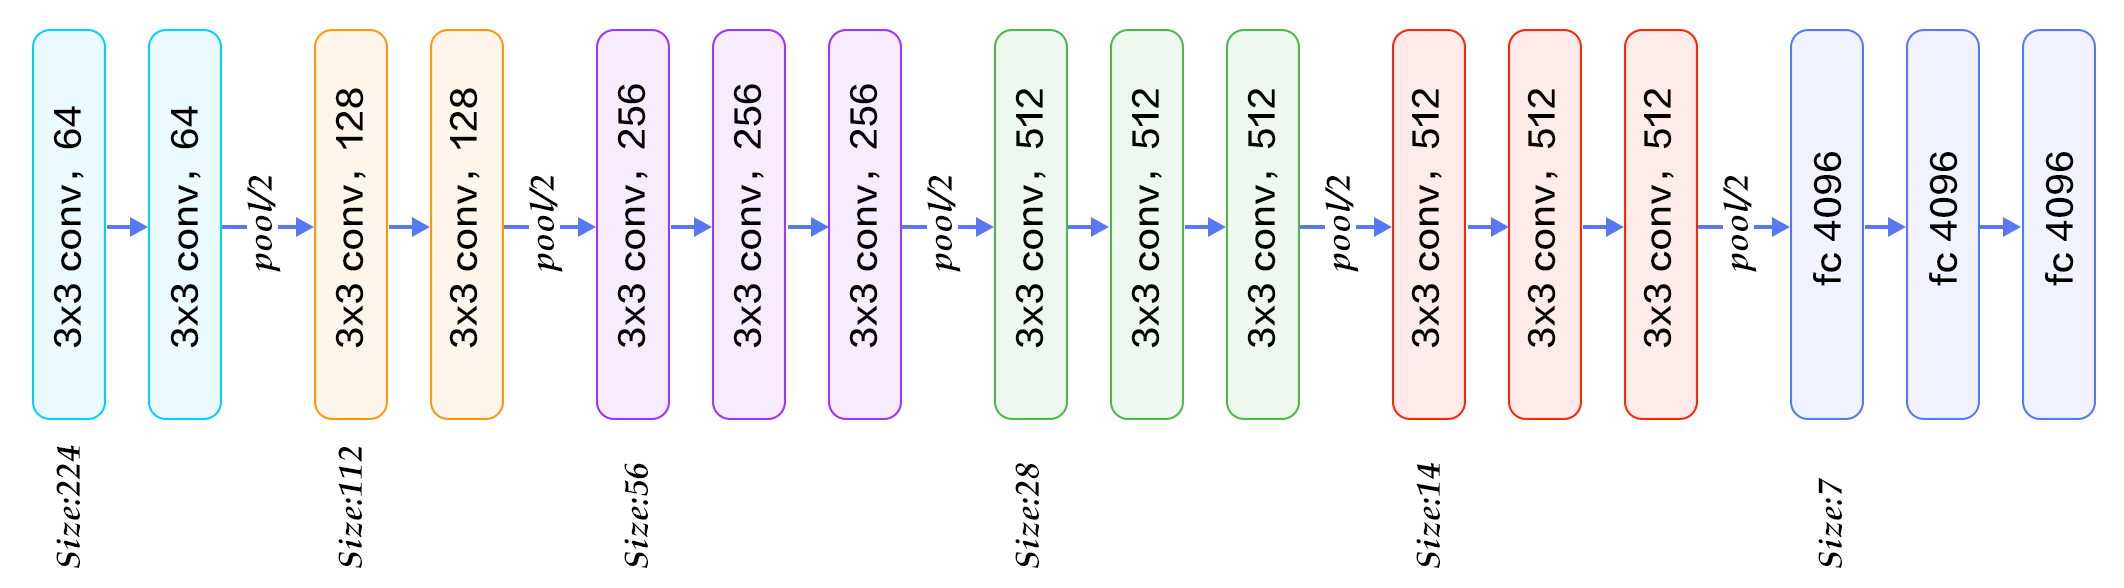

In [ ]:
# 런타임 유형 GPU 모드로 변경
!pip install torch torchvision

In [ ]:
!rm -r images
import os 

# 이미지 파일을 저장할 폴더를 생성합니다.
try:
  os.mkdir("images")
  os.mkdir("images/dogs")
  os.mkdir("images/cats")
except:
  pass

# 이미지들을 지정한 위치에 다운로드합니다.
# images/dogs 밑에 2개
!wget https://i.kinja-img.com/gawker-media/image/upload/s--WFkXeene--/c_scale,f_auto,fl_progressive,q_80,w_800/ol9ceoqxidudap8owlwn.jpg -P images/dogs
!wget https://www.rspcansw.org.au/wp-content/uploads/2017/08/50_a-feature_dogs-and-puppies_mobile.jpg -P images/dogs

# images/cats 밑에 2개
!wget https://www.catster.com/wp-content/uploads/2018/05/A-gray-cat-crying-looking-upset.jpg -P images/cats
!wget https://www.scarymommy.com/wp-content/uploads/2018/01/c1.jpg?w=700 -P images/cats

rm: cannot remove 'images': No such file or directory
--2021-06-30 07:47:20--  https://i.kinja-img.com/gawker-media/image/upload/s--WFkXeene--/c_scale,f_auto,fl_progressive,q_80,w_800/ol9ceoqxidudap8owlwn.jpg
Resolving i.kinja-img.com (i.kinja-img.com)... 151.101.66.166, 151.101.194.166, 151.101.2.166, ...
Connecting to i.kinja-img.com (i.kinja-img.com)|151.101.66.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36509 (36K) [image/jpeg]
Saving to: ‘images/dogs/ol9ceoqxidudap8owlwn.jpg’

ol9ceoqxidudap8owlw 100%[===================>]  35.65K  --.-KB/s    in 0.004s  

2021-06-30 07:47:20 (9.75 MB/s) - ‘images/dogs/ol9ceoqxidudap8owlwn.jpg’ saved [36509/36509]

--2021-06-30 07:47:21--  https://www.rspcansw.org.au/wp-content/uploads/2017/08/50_a-feature_dogs-and-puppies_mobile.jpg
Resolving www.rspcansw.org.au (www.rspcansw.org.au)... 101.0.86.38
Connecting to www.rspcansw.org.au (www.rspcansw.org.au)|101.0.86.38|:443... connected.
HTTP request sent, awaiting r

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
batch_size= 1
learning_rate = 0.0002
num_epoch = 100

DataLoader

In [ ]:
# 라벨(혹은 클래스) 별로 폴더가 저장되어 있는 루트 디렉토리를 지정합니다.
img_dir = "./images"

# 해당 루트 디렉토리를 ImageFolder 함수에 전달합니다.
# 이때 이미지들에 대한 변형도 같이 전달해줍니다.
img_data = dset.ImageFolder(img_dir, transforms.Compose([
                                      transforms.Resize(256),                   # 이미지 크기를 256x256으로 바꿔줍니다.
                                      transforms.RandomResizedCrop(224),        # 256x256 이미지의 랜덤한 위치에서 224x224 크기만큼 샘플링 합니다.
                                      transforms.RandomHorizontalFlip(),        # 랜덤한 확률로 이미지를 좌우반전 합니다.
                                      transforms.ToTensor(),                    # 이미지 데이터를 텐서로 변형합니다.
            ]))

train_loader = data.DataLoader(img_data, batch_size=batch_size,
                            shuffle=True, num_workers=2)


model

BasicBlocks

- 모델에 반복되는 부분이 많기 때문에 이를 함수로 만들어 단순화 합니다.
- 맨 위에 이미지를 보면 컨볼루션 연산이 2번 연속하는 경우와 3번 연속하는 경우가 있는데 이를 각각 만들어줍니다.
- 아래의 코드는 최적의 방법이라기 보다는 그림의 구조를 모방한 코드입니다. 

In [ ]:
# 컨볼루션 연산이 2번 연속하는 경우
# 컨볼루션-활성화함수-컨볼루션-활성화함수-풀링
def conv_2_block(in_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

  
# 컨볼루션 연산이 3번 연속하는 경우
# 컨볼루션-활성화함수-컨볼루션-활성화함수-컨볼루션-활성화함수-풀링
def conv_3_block(in_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

VGG Model

In [ ]:
# 위에서 정의한 블록들을 이용해 VGG 네트워크를 만들어보겠습니다.
# 필터의 개수가 2의 n승의 값을 가지기 때문에 base_dim이란 변수를 추가해서 단순화 했습니다.
# 현재 dog, cat 두 가지 클래스를 구분하려고 하기 때문에 num_classes=2로 설정했습니다.

class VGG(nn.Module):
    def __init__(self, base_dim, num_classes=2):
        super(VGG, self).__init__()
        self.feature = nn.Sequential(
            conv_2_block(3,base_dim),
            conv_2_block(base_dim,2*base_dim),
            conv_3_block(2*base_dim,4*base_dim),
            conv_3_block(4*base_dim,8*base_dim),
            conv_3_block(8*base_dim,8*base_dim),            
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(8*base_dim * 7 * 7, 100),
            nn.ReLU(True),                                                      # True 는 inplace 연산을 하겠다는 의미를 가집니다. inplace 연산은 결과값을 새로운 변수에 값을 저장하는 대신 기존의 데이터를 대체하는것을 의미합니다.
            #nn.Dropout(),
            nn.Linear(100, 20),
            nn.ReLU(True),
            #nn.Dropout(),
            nn.Linear(20, num_classes),
        )

    def forward(self, x):
        x = self.feature(x)
        x = x.view(x.size(0), -1)                                               # x.size(0)를 batch size로 바꿔도 같은 값입니다.
        x = self.fc_layer(x)
        return x

optimizer & Loss

In [ ]:
# gpu가 사용 가능한 경우에는 device를 0번 gpu로 설정하고 불가능하면 cpu로 설정합니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 앞서 정의한대로 vGG 클래스를 인스턴스화 하고 지정한 장치에 올립니다.
model = VGG(base_dim=16).to(device)

# 손실함수 및 최적화함수를 설정합니다.
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 모델 자녀 노드의 이름과 모듈을 출력합니다.
for i in model.named_children():
    print(i)

cpu
('feature', Sequential(
  (0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (3): Sequenti

Train

In [ ]:
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        y_= label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()

    if i % 10 ==0:
        print(loss)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor(0.5769, grad_fn=<NllLossBackward>)
tensor(0.8713, grad_fn=<NllLossBackward>)
tensor(0.4133, grad_fn=<NllLossBackward>)
tensor(1.1135, grad_fn=<NllLossBackward>)
tensor(0.4101, grad_fn=<NllLossBackward>)
tensor(0.3972, grad_fn=<NllLossBackward>)
tensor(0.3634, grad_fn=<NllLossBackward>)
tensor(0.4740, grad_fn=<NllLossBackward>)
tensor(4.5537e-05, grad_fn=<NllLossBackward>)
tensor(0.5148, grad_fn=<NllLossBackward>)


#### GoogLeNet

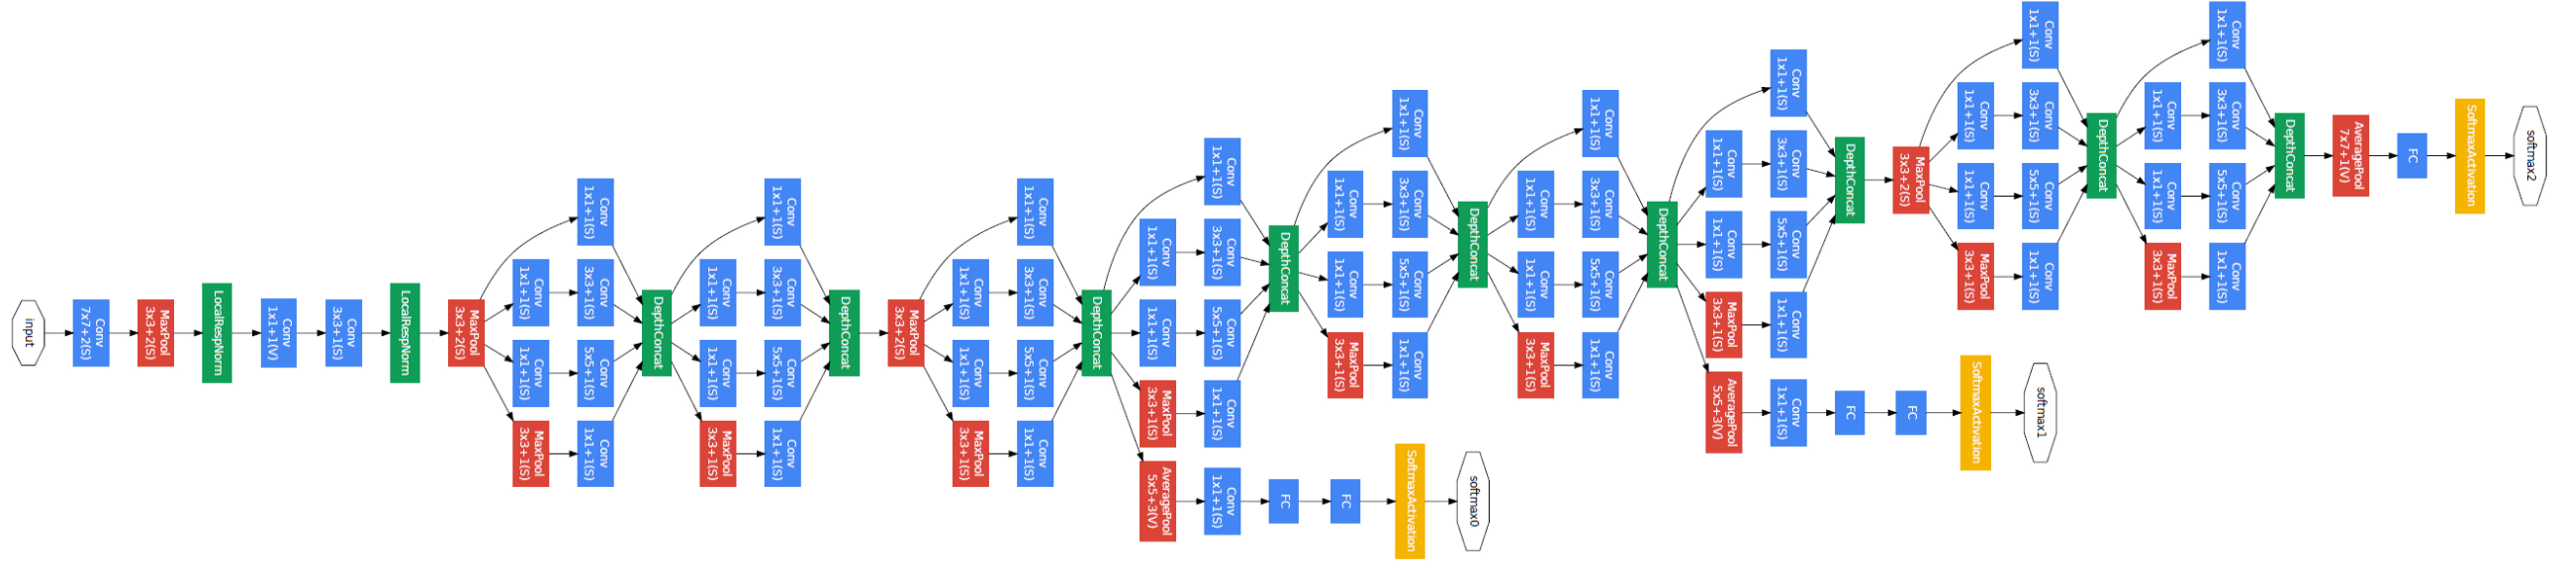

In [ ]:
# 런타임 유형 GPU 모드로 변경
!pip install torch torchvision
!rm -r images
import os 

try:
  os.mkdir("images")
  os.mkdir("images/dogs")
  os.mkdir("images/cats")
except:
  pass

!wget https://i.kinja-img.com/gawker-media/image/upload/s--WFkXeene--/c_scale,f_auto,fl_progressive,q_80,w_800/ol9ceoqxidudap8owlwn.jpg -P images/dogs
!wget https://www.rspcansw.org.au/wp-content/uploads/2017/08/50_a-feature_dogs-and-puppies_mobile.jpg -P images/dogs
  
!wget https://www.catster.com/wp-content/uploads/2018/05/A-gray-cat-crying-looking-upset.jpg -P images/cats
!wget https://www.scarymommy.com/wp-content/uploads/2018/01/c1.jpg?w=700 -P images/cats

rm: cannot remove 'images': No such file or directory
--2021-06-30 12:40:14--  https://i.kinja-img.com/gawker-media/image/upload/s--WFkXeene--/c_scale,f_auto,fl_progressive,q_80,w_800/ol9ceoqxidudap8owlwn.jpg
Resolving i.kinja-img.com (i.kinja-img.com)... 151.101.130.166, 151.101.194.166, 151.101.66.166, ...
Connecting to i.kinja-img.com (i.kinja-img.com)|151.101.130.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36509 (36K) [image/jpeg]
Saving to: ‘images/dogs/ol9ceoqxidudap8owlwn.jpg’

ol9ceoqxidudap8owlw 100%[===================>]  35.65K  --.-KB/s    in 0.002s  

2021-06-30 12:40:14 (14.7 MB/s) - ‘images/dogs/ol9ceoqxidudap8owlwn.jpg’ saved [36509/36509]

--2021-06-30 12:40:14--  https://www.rspcansw.org.au/wp-content/uploads/2017/08/50_a-feature_dogs-and-puppies_mobile.jpg
Resolving www.rspcansw.org.au (www.rspcansw.org.au)... 101.0.86.38
Connecting to www.rspcansw.org.au (www.rspcansw.org.au)|101.0.86.38|:443... connected.
HTTP request sent, awaitin

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
#from torch.utils.data import DataLoader

In [ ]:
batch_size= 1
learning_rate = 0.0002
num_epoch = 100

DataLoader

In [ ]:
img_dir = "./images"
img_data = dset.ImageFolder(img_dir, transforms.Compose([
                                      transforms.Resize(256),                   
                                      transforms.RandomResizedCrop(224),        
                                      transforms.RandomHorizontalFlip(),        
                                      transforms.ToTensor(),                    
            ]))


train_loader = data.DataLoader(img_data, batch_size=batch_size,
                            shuffle=True, num_workers=2)

Base module
- 인셉션 모듈을 구성하는 4가지 연산을 함수로 정의해놓습니다.
- 1x1 컨볼루션
- 1x1 컨볼루션 -> 3x3 컨볼루션
- 1x1 컨볼루션 -> 5x5 컨볼루션
- 3x3 맥스풀링 ->1x1 컨볼루션

In [ ]:
def conv_1(in_dim,out_dim):
    model = nn.Sequential(
        # indim,outdim, kernelsize, stride
        nn.Conv2d(in_dim,out_dim,1,1),
        nn.ReLU(),
    )
    return model

def conv_1_3(in_dim,mid_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,mid_dim,1,1),
        nn.ReLU(),
        # indim,outdim, kernelsize, stride,padding
        nn.Conv2d(mid_dim,out_dim,3,1,1),
        nn.ReLU()
    )
    return model
    
def conv_1_5(in_dim,mid_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,mid_dim,1,1),
        nn.ReLU(),
        nn.Conv2d(mid_dim,out_dim,5,1,2),
        nn.ReLU()
    )
    return model
    

def max_3_1(in_dim,out_dim):
    model = nn.Sequential(
        nn.MaxPool2d(3,1,1),
        nn.Conv2d(in_dim,out_dim,1,1),
        nn.ReLU(),
    )
    return model

inception module

In [ ]:
class inception_module(nn.Module):
    def __init__(self,in_dim,out_dim_1,mid_dim_3,out_dim_3,mid_dim_5,out_dim_5,pool):
        super(inception_module,self).__init__()
        self.conv_1 = conv_1(in_dim,out_dim_1)
        self.conv_1_3 = conv_1_3(in_dim,mid_dim_3,out_dim_3)
        self.conv_1_5 = conv_1_5(in_dim,mid_dim_5,out_dim_5)
        self.max_3_1 = max_3_1(in_dim,pool)

    def forward(self,x):
        out_1 = self.conv_1(x)
        out_2 = self.conv_1_3(x)
        out_3 = self.conv_1_5(x)
        out_4 = self.max_3_1(x)
        output = torch.cat([out_1,out_2,out_3,out_4],1)
        return output

GoogLeNet

![대체 텍스트](https://cdn-images-1.medium.com/max/1600/1*CWJGqfLiVjHAIan82nPbjg.png)

In [ ]:
class GoogLeNet(nn.Module):
    def __init__(self, base_dim, num_classes=2):
        super(GoogLeNet, self).__init__()
        self.num_classes=num_classes
        self.layer_1 = nn.Sequential(
            nn.Conv2d(3,base_dim,7,2,3),
            nn.MaxPool2d(3,2,1),
            nn.Conv2d(base_dim,base_dim*3,3,1,1),
            nn.MaxPool2d(3,2,1),
        )
        self.layer_2 = nn.Sequential(
            inception_module(base_dim*3,64,96,128,16,32,32),
            inception_module(base_dim*4,128,128,192,32,96,64),
            nn.MaxPool2d(3,2,1),
        )
        self.layer_3 = nn.Sequential(
            inception_module(480,192,96,208,16,48,64),
            inception_module(512,160,112,224,24,64,64),
            inception_module(512,128,128,256,24,64,64),
            inception_module(512,112,144,288,32,64,64),
            inception_module(528,256,160,320,32,128,128),
            nn.MaxPool2d(3,2,1),
        )
        self.layer_4 = nn.Sequential(
            inception_module(832,256,160,320,32,128,128),
            inception_module(832,384,192,384,48,128,128), 
            nn.AvgPool2d(7,1),
        )
        self.layer_5 = nn.Dropout2d(0.4)
        self.fc_layer = nn.Linear(1024,self.num_classes)
                
        
    def forward(self, x):
        out = self.layer_1(x)
        out = self.layer_2(out)
        out = self.layer_3(out)
        out = self.layer_4(out)
        out = self.layer_5(out)
        out = out.view(batch_size,-1)
        out = self.fc_layer(out)
        return out

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = GoogLeNet(base_dim=64)
for i in model.named_children():
    print(i)

model = GoogLeNet(base_dim=64).to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

cpu
('layer_1', Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (2): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
))
('layer_2', Sequential(
  (0): inception_module(
    (conv_1): Sequential(
      (0): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
    )
    (conv_1_3): Sequential(
      (0): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
    )
    (conv_1_5): Sequential(
      (0): Conv2d(192, 16, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (3): ReLU()
    )
    (max_3_1): Sequential(
      (0): MaxPool2d(kernel_size=3, stride=1, paddin

In [ ]:
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        y_= label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()

    if i % 10 ==0:
        print(loss)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor(0.7171, grad_fn=<NllLossBackward>)
tensor(0.5505, grad_fn=<NllLossBackward>)
tensor(0.4204, grad_fn=<NllLossBackward>)
tensor(0.3952, grad_fn=<NllLossBackward>)
tensor(0.4201, grad_fn=<NllLossBackward>)
tensor(0.4132, grad_fn=<NllLossBackward>)
tensor(0.4158, grad_fn=<NllLossBackward>)
tensor(1.1556, grad_fn=<NllLossBackward>)
tensor(0.3961, grad_fn=<NllLossBackward>)
tensor(0.3918, grad_fn=<NllLossBackward>)


#### ResNet

일정 수준 이상의 깊이가 되면 오히려 얓은 모델보다 깊은 모델의 성능이 더 떨어진다  
=> 잔차 학습(residual learning)으로 해결

- 앞선 네트워크에서 설명한 부분은 생략했습니다.
- 2015 ILSVRC 1st place
- ResNet-50

![alt text](https://www.codeproject.com/KB/AI/1248963/resnet.png)

In [ ]:
# 런타임 유형 GPU 모드로 변경
!pip install torch torchvision

!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

     |████████████████████████████████| 3.0MB 8.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.1.1
    Uninstalling Pillow-4.1.1:
      Successfully uninstalled Pillow-4.1.1


Processing /root/.cache/pip/wheels/3f/f3/3e/f24b51fe136968f797933559011acd48b16708fc306c924770/Pillow-4.1.1-cp37-cp37m-linux_x86_64.whl
ERROR: torchvision 0.10.0+cu102 has requirement pillow>=5.3.0, but you'll have pillow 4.1.1 which is incompatible.
ERROR: scikit-image 0.16.2 has requirement pillow>=4.3.0, but you'll have pillow 4.1.1 which is incompatible.
ERROR: bokeh 2.3.2 has requirement pillow>=7.1.0, but you'll have pillow 4.1.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0


In [ ]:
!rm -r images
import os 

try:
  os.mkdir("images")
  os.mkdir("images/dogs")
  os.mkdir("images/cats")
except:
  pass

!wget https://i.kinja-img.com/gawker-media/image/upload/s--WFkXeene--/c_scale,f_auto,fl_progressive,q_80,w_800/ol9ceoqxidudap8owlwn.jpg -P images/dogs
!wget https://www.rspcansw.org.au/wp-content/uploads/2017/08/50_a-feature_dogs-and-puppies_mobile.jpg -P images/dogs
  
!wget https://www.catster.com/wp-content/uploads/2018/05/A-gray-cat-crying-looking-upset.jpg -P images/cats
!wget https://www.scarymommy.com/wp-content/uploads/2018/01/c1.jpg?w=700 -P images/cats

--2021-06-30 12:57:04--  https://i.kinja-img.com/gawker-media/image/upload/s--WFkXeene--/c_scale,f_auto,fl_progressive,q_80,w_800/ol9ceoqxidudap8owlwn.jpg
Resolving i.kinja-img.com (i.kinja-img.com)... 151.101.130.166, 151.101.2.166, 151.101.66.166, ...
Connecting to i.kinja-img.com (i.kinja-img.com)|151.101.130.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36509 (36K) [image/jpeg]
Saving to: ‘images/dogs/ol9ceoqxidudap8owlwn.jpg’

ol9ceoqxidudap8owlw 100%[===================>]  35.65K  --.-KB/s    in 0s      

2021-06-30 12:57:04 (79.3 MB/s) - ‘images/dogs/ol9ceoqxidudap8owlwn.jpg’ saved [36509/36509]

--2021-06-30 12:57:04--  https://www.rspcansw.org.au/wp-content/uploads/2017/08/50_a-feature_dogs-and-puppies_mobile.jpg
Resolving www.rspcansw.org.au (www.rspcansw.org.au)... 101.0.86.38
Connecting to www.rspcansw.org.au (www.rspcansw.org.au)|101.0.86.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130940 (128K) [image/jpeg]


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
batch_size= 1
learning_rate = 0.0002
num_epoch = 100

In [ ]:
img_dir = "./images"
img_data = dset.ImageFolder(img_dir, transforms.Compose([
                                      transforms.Resize(256),                   
                                      transforms.RandomResizedCrop(224),        
                                      transforms.RandomHorizontalFlip(),        
                                      transforms.ToTensor(),                    
            ]))

train_loader = data.DataLoader(img_data, batch_size=batch_size,
                            shuffle=True, num_workers=2)

Basic Block  
컨볼루션 연산과 활성화함수는 항상 붙어 있기 때문에 이를 함수로 만들었습니다.

In [ ]:
def conv_block_1(in_dim,out_dim,act_fn,stride=1):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim, kernel_size=1, stride=stride),
        act_fn,
    )
    return model


def conv_block_3(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim, kernel_size=3, stride=1, padding=1),
        act_fn,
    )
    return model

BottleNeck (병목):
  
  1x1합성곱으로 채널 방향으로 압축=> 압축된 상태에서 3x3합성곱으로 추가 특성을 뽑아냄 => 다시 1x1합성곱으로 채널 수 를 늘려준다.

Bottle Neck Module

- Bottle Neck 모듈은 [1x1 컨볼루션 -> 3x3 컨볼루션 -> 1x1 컨볼루션]으로 이루어집니다.
- 맨 위에 네트워크 구조에서도 볼 수 있듯이 실선은 크기가 변하지 않는 경우, 점선은 크기가 줄어드는 경우입니다. 
- 이를 한번에 구현하기 위해 down이라는 변수로 크기 감소 여부를 표시하고 조건문으로 경우의 수를 나눠 구현했습니다.
- 또한 ResNet의 Skip-connection은 단순 더하기로 정의되어 있기 때문에 특성지도의 크기를 일치시켜야 합니다. 
- 이를 위해 차원을 맞춰주는 역할로 dim_equalizer라는 것을 정의했습니다.

In [ ]:
class BottleNeck(nn.Module):
    def __init__(self,in_dim,mid_dim,out_dim,act_fn,down=False):
        super(BottleNeck,self).__init__()
        self.down=down
        
        # 특성지도의 크기가 감소하는 경우
        if self.down:
            self.layer = nn.Sequential(
              conv_block_1(in_dim,mid_dim,act_fn,2),
              conv_block_3(mid_dim,mid_dim,act_fn),
              conv_block_1(mid_dim,out_dim,act_fn),
            )
            self.downsample = nn.Conv2d(in_dim,out_dim,1,2)
            
        # 특성지도의 크기가 그대로인 경우
        else:
            self.layer = nn.Sequential(
                conv_block_1(in_dim,mid_dim,act_fn),
                conv_block_3(mid_dim,mid_dim,act_fn),
                conv_block_1(mid_dim,out_dim,act_fn),
            )
            
        # 더하기를 위해 차원을 맞춰주는 부분
        self.dim_equalizer = nn.Conv2d(in_dim,out_dim,kernel_size=1)
                  
    def forward(self,x):
        if self.down:
            downsample = self.downsample(x)
            out = self.layer(x)
            out = out + downsample
        else:
            out = self.layer(x)
            if x.size() is not out.size():
                x = self.dim_equalizer(x)
            out = out + x
        return out


ResNet 

In [ ]:
class ResNet(nn.Module):

    def __init__(self, base_dim, num_classes=2):
        super(ResNet, self).__init__()
        self.act_fn = nn.ReLU()
        self.layer_1 = nn.Sequential(
            nn.Conv2d(3,base_dim,7,2,3),
            nn.ReLU(),
            nn.MaxPool2d(3,2,1),
        )
        self.layer_2 = nn.Sequential(
            BottleNeck(base_dim,base_dim,base_dim*4,self.act_fn),
            BottleNeck(base_dim*4,base_dim,base_dim*4,self.act_fn),
            BottleNeck(base_dim*4,base_dim,base_dim*4,self.act_fn,down=True),
        )   
        self.layer_3 = nn.Sequential(
            BottleNeck(base_dim*4,base_dim*2,base_dim*8,self.act_fn),
            BottleNeck(base_dim*8,base_dim*2,base_dim*8,self.act_fn),
            BottleNeck(base_dim*8,base_dim*2,base_dim*8,self.act_fn),
            BottleNeck(base_dim*8,base_dim*2,base_dim*8,self.act_fn,down=True),
        )
        self.layer_4 = nn.Sequential(
            BottleNeck(base_dim*8,base_dim*4,base_dim*16,self.act_fn),
            BottleNeck(base_dim*16,base_dim*4,base_dim*16,self.act_fn),
            BottleNeck(base_dim*16,base_dim*4,base_dim*16,self.act_fn),            
            BottleNeck(base_dim*16,base_dim*4,base_dim*16,self.act_fn),
            BottleNeck(base_dim*16,base_dim*4,base_dim*16,self.act_fn),
            BottleNeck(base_dim*16,base_dim*4,base_dim*16,self.act_fn,down=True),
        )
        self.layer_5 = nn.Sequential(
            BottleNeck(base_dim*16,base_dim*8,base_dim*32,self.act_fn),
            BottleNeck(base_dim*32,base_dim*8,base_dim*32,self.act_fn),
            BottleNeck(base_dim*32,base_dim*8,base_dim*32,self.act_fn),
        )
        self.avgpool = nn.AvgPool2d(7,1) 
        self.fc_layer = nn.Linear(base_dim*32,num_classes)
        
    def forward(self, x):
        out = self.layer_1(x)
        out = self.layer_2(out)
        out = self.layer_3(out)
        out = self.layer_4(out)
        out = self.layer_5(out)
        out = self.avgpool(out)
        out = out.view(batch_size,-1)
        out = self.fc_layer(out)
        
        return out


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
    
model = ResNet(base_dim=64).to(device)

'''
for i in model.children():
    print(i)
'''

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

cpu


In [ ]:
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        y_= label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()

    if i % 10 ==0:
        print(loss)

AttributeError: ignored

## 6장 순환 신경망

### 6.2 순환 신경망의 작동 원리

BPTT (backpropagation through time) 시간에 따른 역전파 사용

### 6.3 모델 구현, 학습 및 결과 확인

In [ ]:
!pip install torch torchvision

In [ ]:
import torch 
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
# 하이퍼파라미터 설정

n_hidden = 35 
lr = 0.01
epochs = 1000

In [ ]:
# 사용하는 문자는 영어 소문자 및 몇가지 특수문자로 제한했습니다.
# alphabet(0-25), space(26), ... , start(0), end(1)

string = "hello pytorch. how long can a rnn cell remember? show me your limit!"
chars =  "abcdefghijklmnopqrstuvwxyz ?!.,:;01"

# 문자들을 리스트로 바꾸고 이의 길이(=문자의 개수)를 저장해놓습니다.
char_list = [i for i in chars]
n_letters = len(char_list)

In [ ]:
# 문자를 그대로 쓰지않고 one-hot 벡터로 바꿔서 연산에 쓰도록 하겠습니다.

#Start = [0 0 0 … 1 0]
#a =     [1 0 0 … 0 0]
#b =     [0 1 0 … 0 0]
#c =     [0 0 1 … 0 0]
#...
#end =   [0 0 0 … 0 1]
# 문자열을 one-hot 벡터의 스택으로 만드는 함수
# abc -> [[1 0 0 … 0 0],
#         [0 1 0 … 0 0],
#         [0 0 1 … 0 0]]

def string_to_onehot(string):
    # 먼저 시작 토큰과 끝 토큰을 만들어줍니다.
    start = np.zeros(shape=n_letters ,dtype=int)
    end = np.zeros(shape=n_letters ,dtype=int)
    start[-2] = 1
    end[-1] = 1
    # 여기서부터는 문자열의 문자들을 차례대로 받아서 진행합니다.
    for i in string:
        # 먼저 문자가 몇번째 문자인지 찾습니다.
        # a:0, b:1, c:2,...
        idx = char_list.index(i)
        # 0으로만 구성된 배열을 만들어줍니다.
        # [0 0 0 … 0 0]
        zero = np.zeros(shape=n_letters ,dtype=int)
        # 해당 문자 인데스만 1로 바꿔줍니다.
        # b: [0 1 0 … 0 0]
        zero[idx]=1
        # start와 새로 생긴 zero를 붙이고 이를 start에 할당합니다.
        # 이게 반복되면 start에는 문자를 one-hot 벡터로 바꾼 배열들이 점점 쌓여가게 됩니다.
        start = np.vstack([start,zero])
    # 문자열이 다 끝나면 쌓아온 start와 end를 붙여줍니다.
    output = np.vstack([start,end])
    return output

In [ ]:
# One-hot 벡터를 문자로 바꿔주는 함수 
# [1 0 0 ... 0 0] -> a 
# https://pytorch.org/docs/stable/tensors.html?highlight=numpy#torch.Tensor.numpy

def onehot_to_word(onehot_1):
    # 텐서를 입력으로 받아 넘파이 배열로 바꿔줍니다.
    onehot = torch.Tensor.numpy(onehot_1)
    # one-hot 벡터의 최대값(=1) 위치 인덱스로 문자를 찾습니다.
    return char_list[onehot.argmax()]

In [ ]:
# RNN with 1 hidden layer

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.act_fn = nn.Tanh()
    
    def forward(self, input, hidden):
        # 입력과 hidden state를 cat함수로 붙여줍니다.
        combined = torch.cat((input, hidden), 1)
        # 붙인 값을 i2h 및 i2o에 통과시켜 hidden state는 업데이트, 결과값은 계산해줍니다.
        hidden = self.act_fn(self.i2h(combined))
        output = self.i2o(combined)
        return output, hidden
    
    # 아직 입력이 없을때(t=0)의 hidden state를 초기화해줍니다. 
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)
    
rnn = RNN(n_letters, n_hidden, n_letters)

In [ ]:
# 손실함수와 최적화함수를 설정해줍니다.

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=lr)

In [ ]:
# train

# 문자열을 onehot 벡터로 만들고 이를 토치 텐서로 바꿔줍니다.
# 또한 데이터타입도 학습에 맞게 바꿔줍니다.
one_hot = torch.from_numpy(string_to_onehot(string)).type_as(torch.FloatTensor())
one_hot

tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [ ]:
for i in range(epochs):
    optimizer.zero_grad()
    # 학습에 앞서 hidden state를 초기화해줍니다.
    hidden = rnn.init_hidden()
    
    # 문자열 전체에 대한 손실을 구하기 위해 total_loss라는 변수를 만들어줍니다. 
    total_loss = 0
    for j in range(one_hot.size()[0]-1):
        # 입력은 앞에 글자 
        # pyotrch 에서 p y t o r c
        input_ = one_hot[j:j+1,:]
        # 목표값은 뒤에 글자
        # pytorch 에서 y t o r c h
        target = one_hot[j+1]
        output, hidden = rnn.forward(input_, hidden)
        
        loss = loss_func(output.view(-1),target.view(-1))
        total_loss += loss

    total_loss.backward()
    optimizer.step()

    if i % 10 == 0:
        print(total_loss)

tensor(2.7331, grad_fn=<AddBackward0>)
tensor(1.1724, grad_fn=<AddBackward0>)
tensor(0.6775, grad_fn=<AddBackward0>)
tensor(0.3983, grad_fn=<AddBackward0>)
tensor(0.2587, grad_fn=<AddBackward0>)
tensor(0.1917, grad_fn=<AddBackward0>)
tensor(0.1442, grad_fn=<AddBackward0>)
tensor(0.1158, grad_fn=<AddBackward0>)
tensor(0.1007, grad_fn=<AddBackward0>)
tensor(0.0846, grad_fn=<AddBackward0>)
tensor(0.0720, grad_fn=<AddBackward0>)
tensor(0.0648, grad_fn=<AddBackward0>)
tensor(0.0602, grad_fn=<AddBackward0>)
tensor(0.0519, grad_fn=<AddBackward0>)
tensor(0.0467, grad_fn=<AddBackward0>)
tensor(0.0641, grad_fn=<AddBackward0>)
tensor(0.0466, grad_fn=<AddBackward0>)
tensor(0.0399, grad_fn=<AddBackward0>)
tensor(0.0347, grad_fn=<AddBackward0>)
tensor(0.0348, grad_fn=<AddBackward0>)
tensor(0.0330, grad_fn=<AddBackward0>)
tensor(0.0284, grad_fn=<AddBackward0>)
tensor(0.0256, grad_fn=<AddBackward0>)
tensor(0.0234, grad_fn=<AddBackward0>)
tensor(0.0218, grad_fn=<AddBackward0>)
tensor(0.0394, grad_fn=<A

In [ ]:
# test 
# hidden state 는 처음 한번만 초기화해줍니다.

start = torch.zeros(1,n_letters)
start[:,-2] = 1

with torch.no_grad():
    hidden = rnn.init_hidden()
    # 처음 입력으로 start token을 전달해줍니다.
    input_ = start
    # output string에 문자들을 계속 붙여줍니다.
    output_string = ""

    # 원래는 end token이 나올때 까지 반복하는게 맞으나 끝나지 않아서 string의 길이로 정했습니다.
    for i in range(len(string)):
        output, hidden = rnn.forward(input_, hidden)
        # 결과값을 문자로 바꿔서 output_string에 붙여줍니다.
        output_string += onehot_to_word(output.data)
        # 또한 이번의 결과값이 다음의 입력값이 됩니다.
        input_ = output

print(output_string)

hello pytorch. how mloremebooy  her pycoiy en ionelebnrrere y.yioion


### 6.4 순환 신경망의 한계 및 개선 방안

어느 정도 이상부터는 결과가 한계에 부딪힘  
=> 타임 시퀀스가 늘어나며 역전파 시 하이퍼볼릭 탄젠트 함수의 미분 값이 여러 번 곱해져서다  
=> 하이퍼볼릭 탄젠트 함수를 미분하면 01에서 1사이의 값이 나오고, 기울기 값이 역전파될 때 타임 시퀀스가 길어질수록 모델이 제대로 학습을 하지 못하는 이른바 기울시 손실(vanishing gradient)현상이 일어남

#### LSTM

##### 개념

long short-term memory

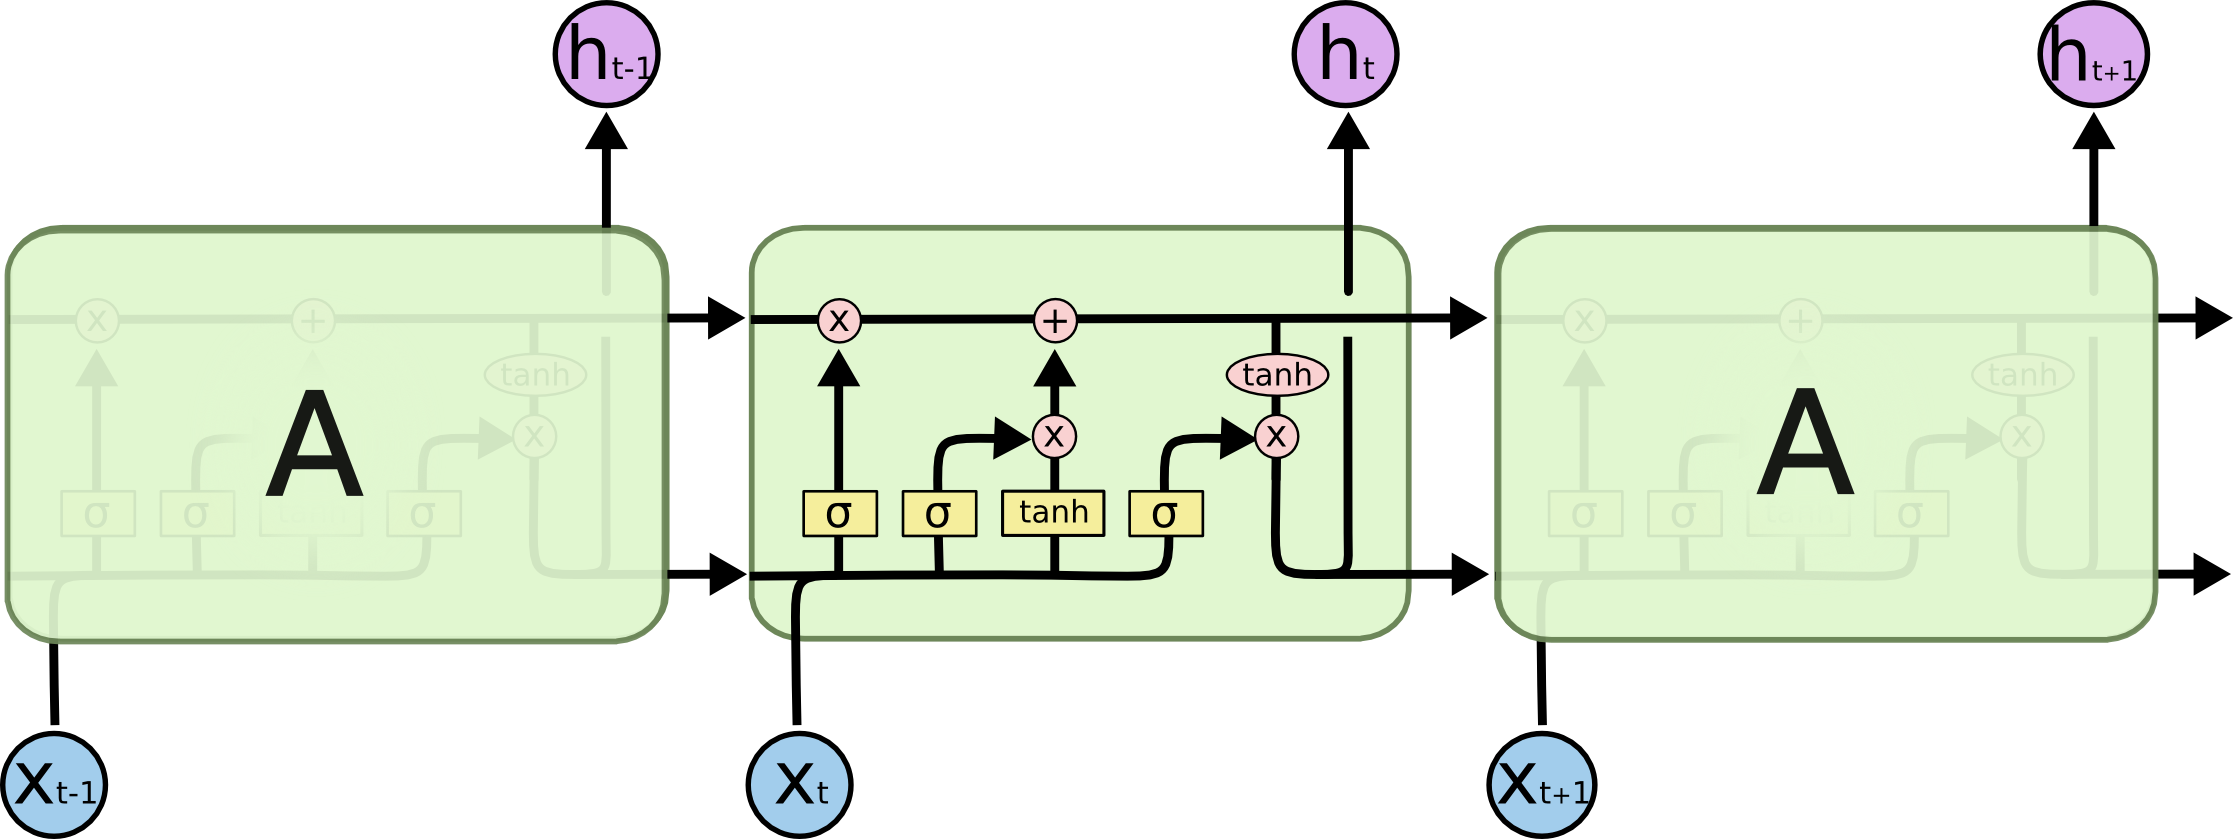

reference : http://colah.github.io/posts/2015-08-Understanding-LSTMs/

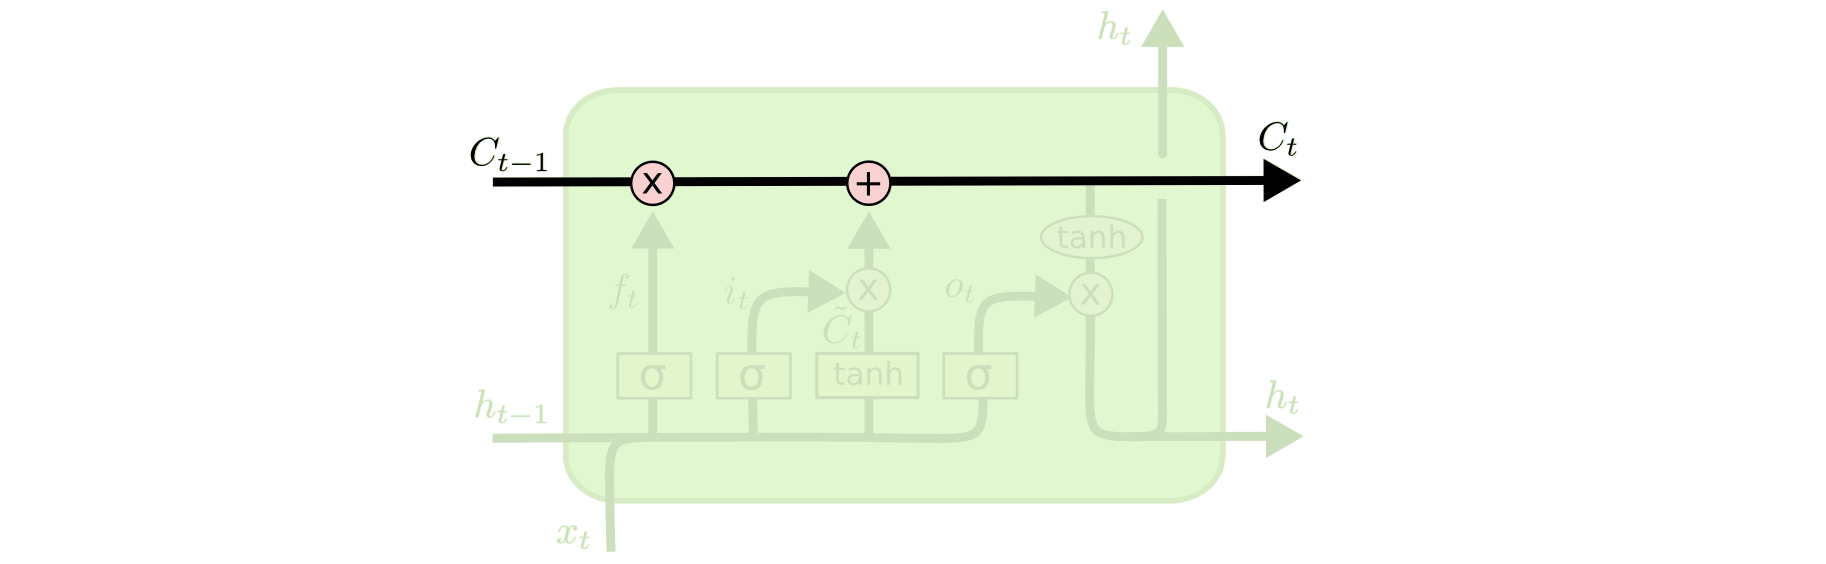

간단히 말하면 기존의 순환 신경망 모델에 장기기억을 담당하는 부분을 추가한 것  
  
기존에는 은닉 상태(hidden state)만 있었다면 셀 상태(cell state)라는 이름을 가지는 전달 부분을 추가

**LSTM cell : forget mechanism**

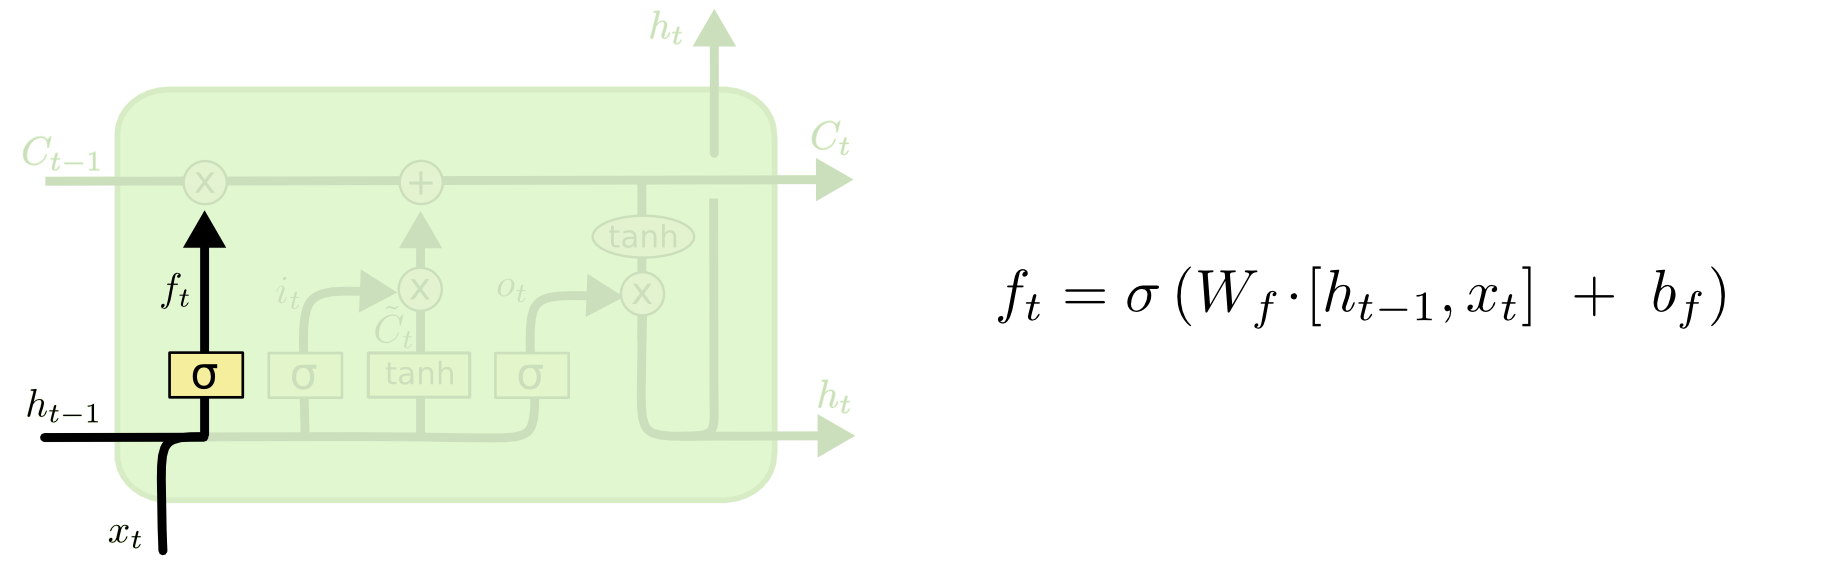





*   forget gate 망각 게이트


*   기존의 정보들로 구성되어 있는 셀 상태의 값을 얼마나 잊어버릴 것인지 정하는 부분
*   시그모이드 결과 값으로 0~1 값이 나오며 이 값이 기존의 정보의 정보를 얼마나 전달할 지 비중이다.



**LSTM cell : input mechanism**

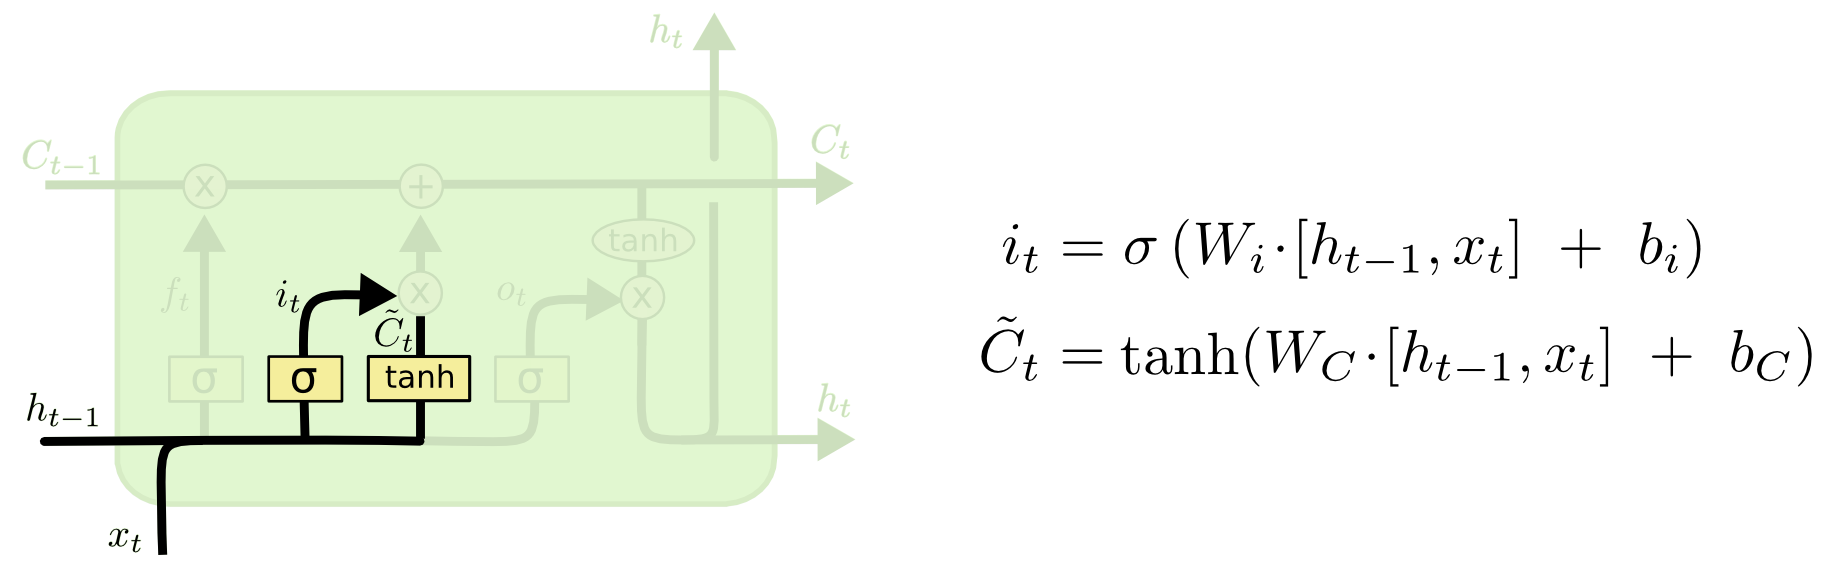




*   input gate 입력 게이트

*   어떤 정보를 얼마큼 셀 상태에 새롭게 저장할 것인지 정하는 부분
*   직전 시점의 은닉 상태 값을 받아서 한 번은 시그모이드 함수를 통과시키고 또 한 번은 하이퍼볼릭 탄젠트 함수를 통과시킨다.

1.   하이퍼볼릭 탄젠트를 통해 나온 값은 -1~1의 값을 가지고 새롭게 셀 상태에 추가할 정보가 된다
2.   시그모이드 함수를 통해 나온 값은 0~1의 비중으로 새롭게 추가할 정보를 얼마큼의 비중으로 셀 상태에 더해줄지 정하게 된다.






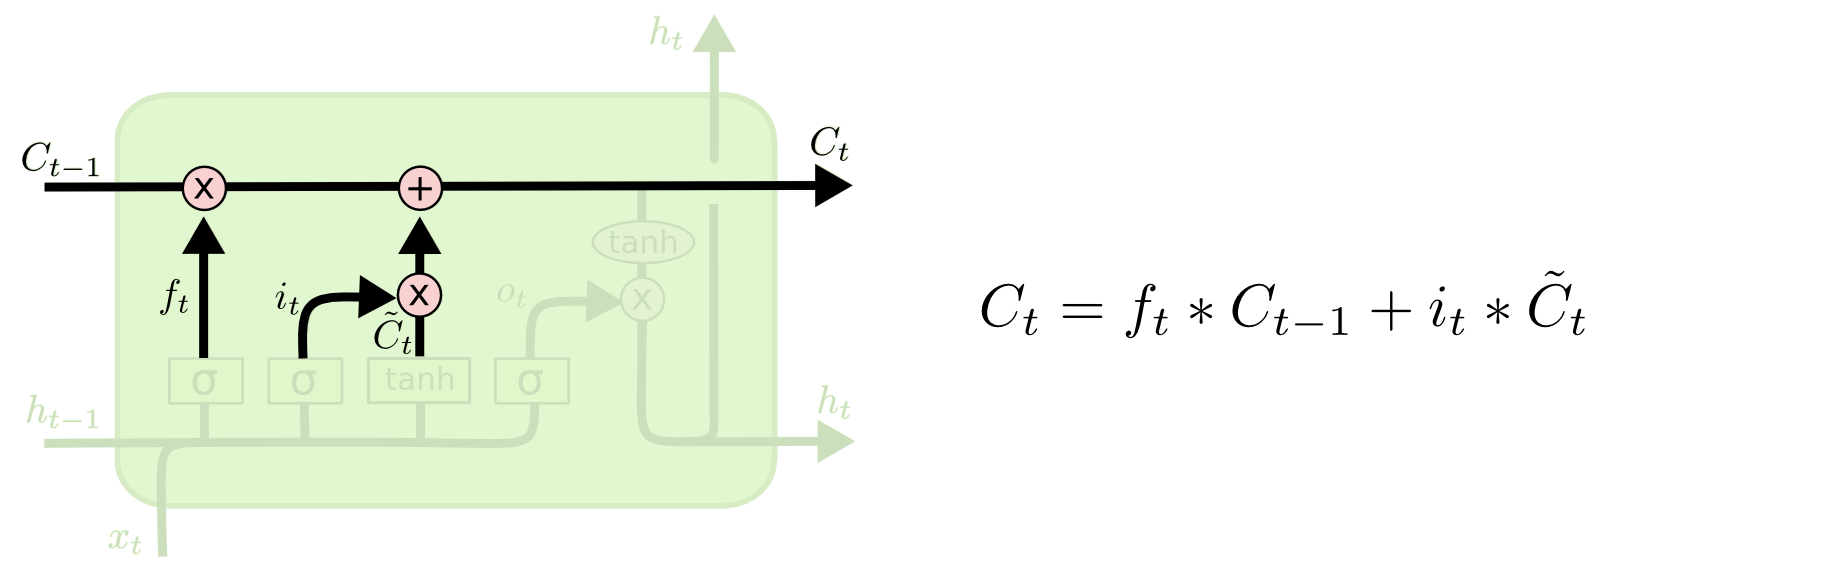

현재 시점의 새로운 입력값과 직전 시점의 은닉상태 값의 조합으로 기존의 셀 상태의 정보를 얼마큼 전달하지도 정하고 어떤 정보를 얼마큼의 비중으로 더할지도 정하는 것

**LSTM cell : output mechanism**

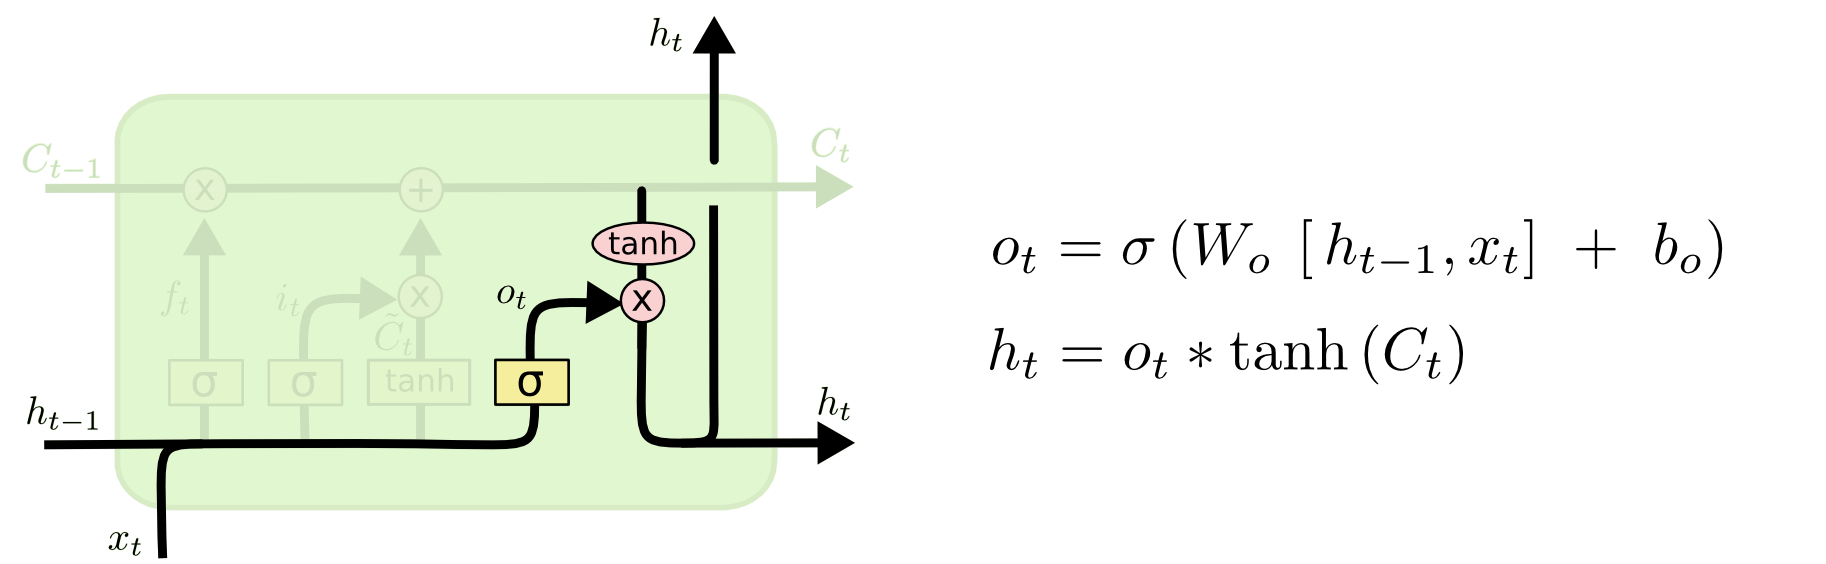




*   현재 시점의 새로운 입력값과 직전 시점의 은닉상태 값의 조합 값을 시그모이드에 통과시켜 비중을 정하고 새로운 은닉 상태는 업데이트된 셀 상태 값을 하이퍼볼릭 탄젠트 함수를 통과시킨 -1~1사이의 값과 비중을 곱한 값으로 생성된다.




##### code

In [ ]:

import torch 
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
# Preprocessing string data
# alphabet(0-25), space(26),..., start, end 

string = "hello pytorch. how long can a rnn cell remember? show me your limit!"
chars = "abcdefghijklmnopqrstuvwxyz ?!.,:;01"
char_list = [i for i in chars]
char_len = len(char_list)

char_len

35

In [ ]:
# String to onehot vector
# a -> [1 0 0 ... 0 0]

def string_to_onehot(string):
    start = np.zeros(shape=char_len ,dtype=int)
    end = np.zeros(shape=char_len ,dtype=int)
    start[-2] = 1
    end[-1] = 1
    for i in string:
        idx = char_list.index(i)
        zero = np.zeros(shape=char_len ,dtype=int)
        zero[idx]=1
        start = np.vstack([start,zero])
    output = np.vstack([start,end])
    return output

In [ ]:
# Onehot vector to word
# [1 0 0 ... 0 0] -> a 

def onehot_to_word(onehot_1):
    onehot = torch.Tensor.numpy(onehot_1)
    return char_list[onehot.argmax()]

LSTM 인수
- https://pytorch.org/docs/stable/nn.html?highlight=lstm#torch.nn.LSTM
- input_size:     입력의 특성 개수
- hidden_size:    hidden state의 특성 개수
- num_layers:     LSTM을 몇층으로 쌓을것인가 여부
- bias:           편차의 사용 여부
- batch_first:    사용하면 입력과 출력의 형태가 [batch, seq, feature]
- dropout:        드롭아웃 사용여부
- bidirectional:  참고 http://solarisailab.com/archives/1515

In [ ]:
# 하이퍼파라미터 설정
# 문자열을 단어 하나씩 잘러서 사용하는걸로 구현해서 batch_size 1로 고정입니다.
# batch_size가 1보다 큰 경우는 다음 실습코드에 있습니다.
batch_size = 5

# seq_len는 바꿔도 학습은 되지만 테스트시 편의성을 위해 1로 설정했습니다.
seq_len = 1

# num_layers는 입력 형식에만 맞게 형태를 바꿔주면 됩니다.
num_layers = 3
input_size = char_len
hidden_size = 35 
lr = 0.01
num_epochs = 1000

one_hot = torch.from_numpy(string_to_onehot(string)).type_as(torch.FloatTensor())

print(one_hot.size())

torch.Size([70, 35])


In [ ]:
# RNN with 1 hidden layer

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size,num_layers):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size,hidden_size,num_layers,batch_first=True)
        
    def forward(self,input_,hidden,cell):
        output,(hidden,cell) = self.lstm(input_,(hidden,cell))
        return output,hidden,cell
    
    def init_hidden_cell(self):
        hidden = torch.zeros(num_layers,batch_size,hidden_size)
        cell = torch.zeros(num_layers,batch_size,hidden_size)
        return hidden,cell
    
rnn = RNN(input_size,hidden_size, num_layers)

In [ ]:
# Loss function & Optimizer

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=lr)

In [ ]:
j=0
input_data = one_hot[j:j+batch_size].view(batch_size,seq_len, input_size)
print(input_data.size())

hidden,cell = rnn.init_hidden_cell()
print(hidden.size(),cell.size())

output, hidden,cell = rnn(input_data,hidden,cell)
print(output.size(),hidden.size(),cell.size())

torch.Size([5, 1, 35])
torch.Size([3, 5, 35]) torch.Size([3, 5, 35])
torch.Size([5, 1, 35]) torch.Size([3, 5, 35]) torch.Size([3, 5, 35])


In [ ]:
unroll_len = one_hot.size()[0]//seq_len -1
for i in range(num_epochs):
    optimizer.zero_grad()
    hidden,cell = rnn.init_hidden_cell()
    
    loss = 0
    for j in range(unroll_len-batch_size+1):
       # batch size에 맞게 one-hot 벡터를 스택 합니다.
        # 예를 들어 batch size가 3이면 pytorch에서 pyt를 one-hot 벡터로 바꿔서 쌓고
        # 목표값으로 yto를 one-hot 벡터로 바꿔서 쌓는 과정입니다.
        input_data = torch.stack([one_hot[j+k:j+k+seq_len] for k in range(batch_size)],dim=0)
        label = torch.stack([one_hot[j+k+1:j+k+seq_len+1] for k in range(batch_size)],dim=0)        
        #input_data = one_hot[j:j+seq_len].view(seq_len,batch_size,input_size) 
        #label = one_hot[j+1:j+seq_len+1].view(seq_len,batch_size,input_size)
   
        
        output, hidden, cell = rnn(input_data,hidden,cell)
        loss += loss_func(output.view(1,-1),label.view(1,-1))
        
    loss.backward()
    optimizer.step()

    if i%100 ==0:
        print(loss)

tensor(0.0084, grad_fn=<AddBackward0>)
tensor(0.0084, grad_fn=<AddBackward0>)
tensor(0.0083, grad_fn=<AddBackward0>)
tensor(0.0083, grad_fn=<AddBackward0>)
tensor(0.0083, grad_fn=<AddBackward0>)
tensor(0.0083, grad_fn=<AddBackward0>)
tensor(0.0082, grad_fn=<AddBackward0>)
tensor(0.0084, grad_fn=<AddBackward0>)
tensor(0.0082, grad_fn=<AddBackward0>)
tensor(0.0082, grad_fn=<AddBackward0>)


In [ ]:
hidden,cell = rnn.init_hidden_cell()

for j in range(unroll_len-batch_size+1):
    input_data = torch.stack([one_hot[j+k:j+k+seq_len] for k in range(batch_size)],dim=0)
    label = torch.stack([one_hot[j+k+1:j+k+seq_len+1] for k in range(batch_size)],dim=0) 
    
    output, hidden, cell = rnn(input_data,hidden,cell)
    for k in range(batch_size):
        print(onehot_to_word(output[k].data),end="")
        if j < unroll_len-batch_size:
            break

hello pytorch. how long can a rnn cell remember? show me your limit!1

#### GRU

gated recurrent unit

##### 개념

GRU는 LSTM보다 간단한 구조를 가지고 있음에도 성능면에서는 밀리지 않는 RNN의 변형 형태이다.  
- 논문 : https://arxiv.org/pdf/1406.1078.pdf

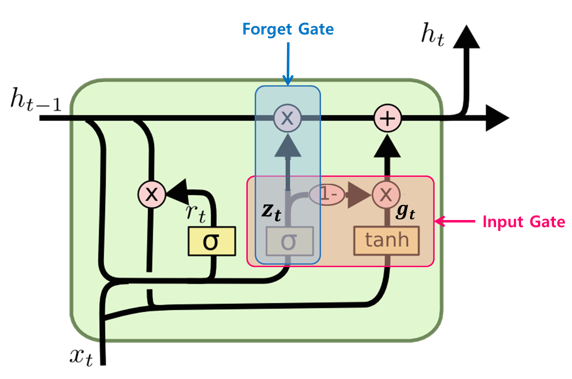

$$ \begin{eqnarray} \mathbf{r}_{t} & = & \sigma \left( \mathbf{W}_{xr}^{T} \cdot \mathbf{x}_{t} + \mathbf{W}_{hr}^{T} \cdot \mathbf{h}_{t-1} + \mathbf{b}_{r} \right) \\ \mathbf{z}_{t} & = & \sigma \left( \mathbf{W}_{xz}^{T} \cdot \mathbf{x}_{t} + \mathbf{W}_{hz}^{T} \cdot \mathbf{h}_{t-1} + \mathbf{b}_{z} \right) \\ \mathbf{g}_{t} & = & \tanh \left( \mathbf{W}_{xg}^{T} \cdot \mathbf{x}_{t} + \mathbf{W}_{hg}^{T} \cdot \left( \mathbf{r}_{t} \otimes \mathbf{h}_{t-1} \right) + \mathbf{b}_{g} \right) \\ \mathbf{h}_{t} & = & \mathbf{z}_{t} \otimes \mathbf{h}_{t-1} + \left( 1 - \mathbf{z}_{t} \right) \otimes \mathbf{g}_{t} \end{eqnarray} $$

reference : https://github.com/ExcelsiorCJH/Hands-On-ML/blob/master/Chap14-Recurrent_Neural_Networks/Chap14_3-Recurrent_Neural_Networks.ipynb

GRU는 LSTM과는 달리 셀 상태와 은닉 상태를 분리하지 않고 은닉 상태 하나로 합쳤다.  
Forget, Input, Output 3개의 게이트가 존재했던 LSTM에 비해 GRU에서는 Forget Gate + Input Gate를 합친 Update와 Reset 게이트 두 가지만이 존재  
=> LSTM과 성능은 비슷하지만, 학습속도가 빠르다.


**Update Gate**




*   현재 시점의 새로운 입력값과 직전 시점의 은닉 상태 값에 가중치를 곱하고 시그모이드 함수를 통과시켜 업데이트할 비중을 정하는 부분이다.



**Reset Gate**



*   업데이트 게이트와 같은 입력을 받아서 동일하게 시그모이드 함수를 통해 비중을 정하며, 이 비중은 그다음 줄 수식에서 현재시점의 은닉 상태( ht)를 구할 때 기존 은닉상태 값을 얼마큼 반영할지 정하는데 사용된다.
*   현재 시점의 은닉상태(ht)는 기존의 은닉상태에 가중치가 곱해진 값과 새로운 입력값을 입력으로 받아 가중치를 곱한 후 하이퍼볼릭 탄젠트 함수를 통과해 얻은 새로운 정보의 값을 리턴한다. 



####임베딩

참고 : https://github.com/corazzon/KaggleStruggle/blob/master/word2vec-nlp-tutorial/tutorial-part-2.ipynb

이전까지는 알파벳이나 문자 하나하나를 원-핫 벡터로 바꿔서 연산을 했지만 이 방법은 의미적 연산과 확장성이라는 측면에서 한계점을 가지고 있다.  


*   원-핫 벡터 간의 내적은 항상 0이 나오기 때문에 두 알파벳 또는 단어, 더 나아가서는 문장 간의 의미적 차이나 유사도를 구하는 것이 불가능하다.
*   하나의 요소가 추가되면 벡터의 길이가 늘어나기 떄문에 기존의 모델이 무의미해진다.



이를 극복하기 위해 임베딩(embedding)이라는 방법이 있다.  
간단하게 말하면 알파벳이나 단어 같은 기본 단위 요소들을 일정한 길이를 가지는 벡터 공간에 투영하는 것이다.

워드 임베딩은 일정한 크기의 벡터에 단어들을 투영하는 방법이라고 이해하면 쉽다.  
단어들을 벡터화하는 것 : word2vec



word2vec은 분산 된 텍스트 표현을 사용하여 개념 간 유사성을 본다.

단어의 임베딩 과정을 실시간으로 시각화 : http://ronxin.github.io/wevi/

대표적인 기법으로는 CBOW와 skip-gram이 있다.

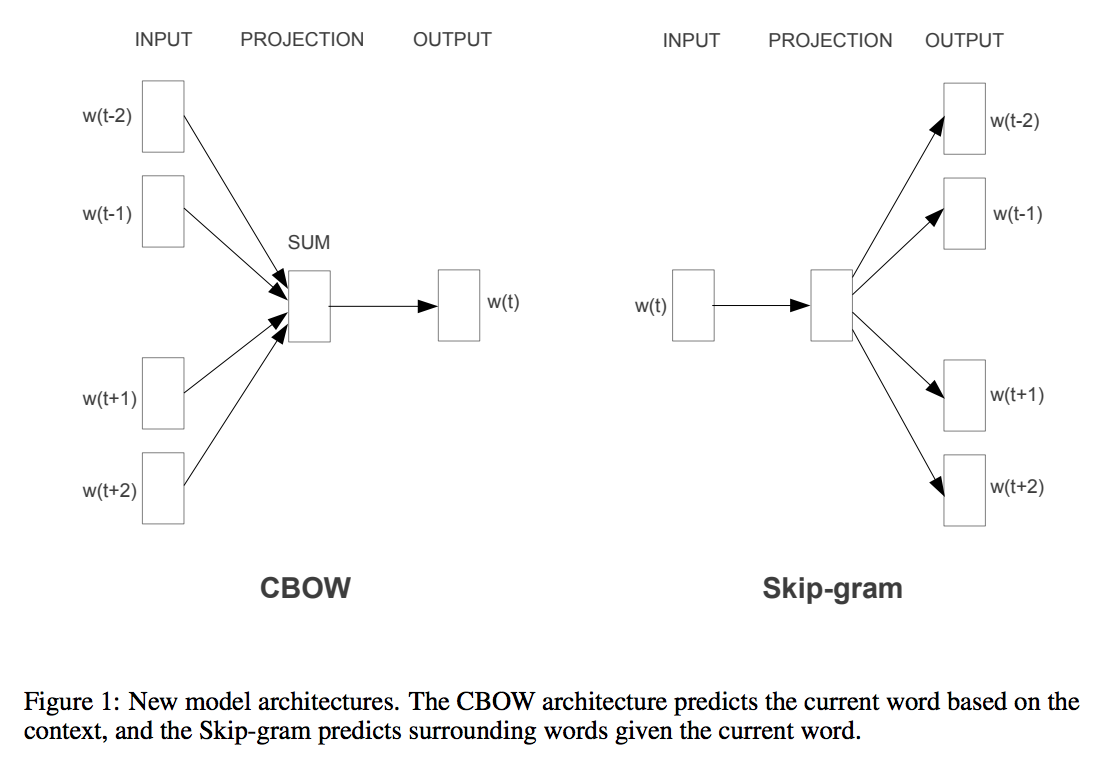

출처 : https://arxiv.org/pdf/1301.3781.pdf

https://arxiv.org/pdf/1411.2738.pdf

**CBOW continuous bag of-words**

주변 단어들로부터 가운데 들어갈 단어가 나오도록 임베딩하는 방식

CBOW(continuous bag-of-words)는 전체 텍스트로 하나의 단어를 예측하기 때문에 작은 데이터셋일 수록 유리하다.
아래 예제에서 __ 에 들어갈 단어를 예측한다.
  
     1) __가 맛있다.   
     2) __를 타는 것이 재미있다.   
     3) 평소보다 두 __로 많이 먹어서 __가 아프다.  


**skip-gram**

CBOW와는 반대로 중심 단어로부터 주변 단어들이 나오도록 모델을 학습하여 임베딩 벡터를 얻는 방식

Skip-Gram은 타겟 단어들로부터 원본 단어를 역으로 예측하는 것이다. CBOW와는 반대로 컨텍스트-타겟 쌍을 새로운 발견으로 처리하고 큰 규모의 데이터셋을 가질 때 유리하다.

배라는 단어 주변에 올 수 있는 단어를 예측한다.

    1)  배가 맛있다.   
    2) 배를 타는 것이 재미있다.   
    3) 평소보다 두 *배*로 많이 먹어서 *배*가 아프다.  

https://ratsgo.github.io/natural%20language%20processing/2017/03/08/word2vec/

#### 임베딩 함수를 이용한 LSTM, GRU구현

torch.nn에는 torch.nn.Embedding이라는 클래스가 있는데, 이 클래스를 사용하면 임베딩을 쉽게 생성하고 학습시킬 수 있다. 

In [ ]:
!rm -r data
import os 

try:
  os.mkdir("./data")
except:
  pass

!wget https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/tinyshakespeare/input.txt -P ./data

rm: cannot remove 'data': No such file or directory
--2021-07-15 15:01:29--  https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘./data/input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2021-07-15 15:01:29 (17.7 MB/s) - ‘./data/input.txt’ saved [1115394/1115394]



In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 5.1MB/s 


In [ ]:
import torch
import torch.nn as nn
import unidecode
import string
import random
import re
import time, math

In [ ]:
num_epochs = 2000
print_every = 100
plot_every = 10
chunk_len = 200
hidden_size = 100
batch_size = 1
num_layers = 1
embedding_size = 70
lr = 0.002

In [ ]:
all_characters = string.printable
n_characters = len(all_characters)
print(all_characters)
print('num_chars = ', n_characters)

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

num_chars =  100


get text data

In [ ]:
file = unidecode.unidecode(open('./data/input.txt').read())
file_len = len(file)
print('file_len =', file_len)

file_len = 1115394


In [ ]:
file

"First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you know Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us kill him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be done: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citizens, the patricians good.\nWhat authority surfeits on would relieve us: if they\nwould yield us but the superfluity, while it were\nwholesome, we might guess they relieved us humanely;\nbut they think we are too dear: the leanness that\nafflicts us, the object of our misery, is as an\ninventory to particularise their abundance; our\nsufferance is a gain to them Let us revenge this with\nour pikes, ere we become rakes: for the gods know I\nspeak this in hunger 

function for text processing

In [ ]:
def random_chunk():
    start_index = random.randint(0, file_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return file[start_index:end_index]

print(random_chunk())

e:
It is a kind of history.

SLY:
Well, well see't. Come, madam wife, sit by my side
and let the world slip: we shall ne'er be younger.

LUCENTIO:
Tranio, since for the great desire I had
To see fair P


char to tensor

In [ ]:
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return tensor

print(char_tensor('ABCdef'))

tensor([36, 37, 38, 13, 14, 15])


In [ ]:
def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

인수
- num_embeddings :사용할 문자나 단어의 가지수
- embedding_dim : 임베딩할 벡터 공간의 크기

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, output_size, num_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.embedding_size = embedding_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        
        self.encoder = nn.Embedding(self.input_size, self.embedding_size)
        self.rnn = nn.GRU(self.embedding_size,self.hidden_size,self.num_layers)
        self.decoder = nn.Linear(self.hidden_size, self.output_size)
        
    
    def forward(self, input, hidden):
        out = self.encoder(input.view(1,-1))
        out,hidden = self.rnn(out,hidden)
        out = self.decoder(out.view(batch_size,-1))
        return out,hidden

    def init_hidden(self):
        hidden = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        return hidden
    
model = RNN(n_characters, embedding_size, hidden_size, n_characters, num_layers)

In [ ]:
inp = char_tensor("A")
print(inp)
hidden = model.init_hidden()
print(hidden.size())

out,hidden = model(inp,hidden)
print(out.size())

tensor([36])
torch.Size([1, 1, 100])
torch.Size([1, 100])


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_func = nn.CrossEntropyLoss()

In [ ]:
def test():
    start_str = "b"
    inp = char_tensor(start_str)
    hidden = model.init_hidden()
    x = inp

    print(start_str,end="")
    for i in range(200):
        output,hidden = model(x,hidden)

        output_dist = output.data.view(-1).div(0.8).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        predicted_char = all_characters[top_i]

        print(predicted_char,end="")

        x = char_tensor(predicted_char)

In [ ]:
y_

tensor([14])

In [ ]:
for i in range(num_epochs):
    inp,label = random_training_set()
    hidden = model.init_hidden()

    loss = torch.tensor([0]).type(torch.FloatTensor)
    optimizer.zero_grad()
    for j in range(chunk_len-1):
        x  = inp[j]
        y_ = label[j].unsqueeze(0).type(torch.LongTensor)
        y,hidden = model(x,hidden)
        loss += loss_func(y,y_)

    loss.backward()
    optimizer.step()
    
    if i % 100 == 0:
        print("\n",loss/chunk_len,"\n")
        test()
        print("\n","="*100)


 tensor([4.6229], grad_fn=<DivBackward0>) 

bTW3tYfx{~uFrVCaANI4k]@zgMw%V&Ozy\V58}7:V^
zZuR:Cv26{	h
ltU'8>;21J#
9!<}PnV^m"_

 tensor([2.4477], grad_fn=<DivBackward0>) 

b`RIy/S
TONSA'T bount thae,
Soe th wave yoou the it winn sol moud aou her iy sand he awI as, wared ean araly at mant, ; oou ore he thoull, anond pm
Tou oule. enthe we gength witor geru time hove walong

 tensor([2.2728], grad_fn=<DivBackward0>) 

bSy bon bu;e coumy?

IALJIO:

TEVBCxGA:
That hin?

AESIA
OLO:

BRICITENRO:
That hat haf becly, he I ond, thit in cin.

INGNYA
I I:
O Cva ke there ashe th ofos mad caticvere colet;-use thompes,
Ore cove

 tensor([2.1341], grad_fn=<DivBackward0>) 

by'd gall to me is of sumand tire thand sperend?

ME>RPTERTIOMS:
A's you thay cerefer thater ke, yo belvend to  to not ende, hith falser aing, and thath or wher your
Yelat dear, me at nis Rore ie hugh 

 tensor([2.0372], grad_fn=<DivBackward0>) 

bre ficknge?

MIUL:
Coulle. all the Drat; this mous distus.

CERDCLA:
CWhan the the so